<a href="https://colab.research.google.com/github/sky16k/cvml/blob/main/cvml05_ConvNN_dogs_vs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#/drive/data

In [6]:
from google.colab import drive
drive.mount('/content/drive')

import os, sys
data_path = '/content/data'
os.symlink('/content/drive/MyDrive/скул/DS/cvml/cvml05/data', data_path)
sys.path.insert(0,data_path)
# try:
# except:
#     pass


Mounted at /content/drive


In [7]:
import os, sys

data_path = '/content/models'
os.symlink('/content/drive/MyDrive/скул/DS/cvml/cvml05/models', data_path)
sys.path.insert(0,data_path)


In [8]:
import os, sys

data_path = '/root/.kaggle'
os.symlink('/content/drive/MyDrive/скул/DS/kaggle', data_path)
sys.path.insert(0,data_path)
# try:
#     os.symlink('/content/drive/MyDrive/скул/DS/kaggle', data_path)
#     sys.path.insert(0,data_path)
# except:
#     pass
# Then you can install a library, and specify the target.
# !pip install --target=$data_path vk_api_config.py

In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2


In [10]:
# @title Generate table

shortcuts = r"""
Action                            Mac         Linux                Windows
Add cursors                       ⌥ ⌘ ↑/↓     Shift Alt ↑/↓        Ctrl Alt ↑/↓
Add cursor on next match          ⌘ D         Ctrl D               Ctrl D
Add cursor on all matches         ⇧ ⌘ L       Shift Ctrl L         Ctrl Shift L
Move line up/down                 ⌥ ↑/↓       Alt ↑/↓              Alt ↑/↓
Copy line up/down                 ⇧ ⌥ ↑/↓     Ctrl Shift Alt ↑/↓   Shift Alt ↑/↓
Delete left                       ⌘ ⌫         Ctrl Backspace       Ctrl Backspace
Delete right                      ⌃ k         (Unset by default)   (Unset by default)
Find with selection               ⌘ E         (Unset by default)   (Unset by default)
Expand/shrink selection           ⇧ ⌃ ⌘ →/←   Shift Alt →/←        Shift Alt →/←
Go to bracket                     ⇧ ⌘ \       Ctrl Shift \         Ctrl Shift \
Replace with next/previous value  ⇧ ⌘ , / .   Ctrl Shift , / .     Ctrl Shift , / .
Transpose letters                 ⌃ T         (Unset by default)   (Unset by default)
"""

import io
import pandas as pd
df = pd.read_csv(io.StringIO(shortcuts), delimiter=' {2,}', engine='python')
df = df.set_index('Action').drop(columns=['Mac'])
df

Linux             Windows
Action                                                                  
Add cursors                            Shift Alt ↑/↓        Ctrl Alt ↑/↓
Add cursor on next match                      Ctrl D              Ctrl D
Add cursor on all matches               Shift Ctrl L        Ctrl Shift L
Move line up/down                            Alt ↑/↓             Alt ↑/↓
Copy line up/down                 Ctrl Shift Alt ↑/↓       Shift Alt ↑/↓
Delete left                           Ctrl Backspace      Ctrl Backspace
Delete right                      (Unset by default)  (Unset by default)
Find with selection               (Unset by default)  (Unset by default)
Expand/shrink selection                Shift Alt →/←       Shift Alt →/←
Go to bracket                           Ctrl Shift \        Ctrl Shift \
Replace with next/previous value    Ctrl Shift , / .    Ctrl Shift , / .
Transpose letters                 (Unset by default)  (Unset by default)

#Домашнее задание

## осн. текст

In [ ]:
'''
Домашнее задание «Обучение сверточной сети на практике»

Задание
Преподаватель: Наталья Баданина, Юлия Пономарева, Артём Качалкин

Классификация изображений: Cats vs Dogs
Обучить модель классификации изображение на 2 класса.
Исходные данные и валидация решения на kaggle в рамках
контеста Cats vs Dogs. Шаблон ipython-ноутбука для решения
можно скачать по ссылке (https://github.com/a4tunado/lectures/tree/master/006).
Решения необходимо прислать в виде ipython-ноутбука с указанием
значения метрики на Leaderboard.
Задание засчитывается при значениях метрики Log Loss меньше 0.3.

Датасет (https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition)

Подготовьте решение к 23 ноября 23:59
'''

## Задание 1

###текст

In [ ]:
# комментарий эксперта
'''

'''

In [ ]:
'''

'''

###программа

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Загружаем исходные данные

In [6]:
!pip install kaggle

In [8]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

100% 810M/814M [00:10<00:00, 113MB/s] 
100% 814M/814M [00:10<00:00, 79.9MB/s]


In [ ]:
# !kaggle competitions download -c digit-recognizer

 98% 15.0M/15.3M [00:00<00:00, 156MB/s]
100% 15.3M/15.3M [00:00<00:00, 157MB/s]


In [10]:
import os
import zipfile
with zipfile.ZipFile('/content/dogs-vs-cats-redux-kernels-edition.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/data/external')


In [13]:
import os
import zipfile
with zipfile.ZipFile('/content/data/external/train.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/data/external')


In [1]:
import os
import zipfile
with zipfile.ZipFile('/content/data/external/test.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/data/external')


FileNotFoundError: ignored

In [90]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import vgg16

print(tf.__version__)
print(tf.executing_eagerly())

2.14.0
True


## Функции загрузки данных

In [13]:
import os
from random import shuffle
from glob import glob

IMG_SIZE = (224, 224)  # размер входного изображения сети


In [ ]:

train_files = glob('/content/data/external/train/*.jpg')

In [14]:

test_files = glob('/content/data/external/test/*.jpg')


In [14]:

# загружаем входное изображение и предобрабатываем
def load_image(path, target_size=IMG_SIZE):
    img = cv2.imread(path)[...,::-1]
    img = cv2.resize(img, target_size)
    return vgg16.preprocess_input(img)  # предобработка для VGG16

# функция-генератор загрузки обучающих данных с диска
def fit_generator(files, batch_size=32):
    batch_size = min(batch_size, len(files))
    while True:
        shuffle(files)
        for k in range(len(files) // batch_size):
            i = k * batch_size
            j = i + batch_size
            if j > len(files):
                j = - j % len(files)
            x = np.array([load_image(path) for path in files[i:j]])
            y = np.array([1. if os.path.basename(path).startswith('dog') else 0.
                          for path in files[i:j]])
            yield (x, y)

# функция-генератор загрузки тестовых изображений с диска
def predict_generator(files):
    while True:
        for path in files:
            yield np.array([load_image(path)])

In [17]:
len(train_files)

25000

In [18]:
len(test_files)

12500

In [19]:
import pickle
# save the model
with open('/content/data/intermid/train_files_list.lst', 'wb') as fid:
    pickle.dump(train_files, fid)

In [20]:
import pickle
# save the model
with open('/content/data/intermid/test_files_list.lst', 'wb') as fid:
    pickle.dump(test_files, fid)

In [15]:
import pickle
# load it again
with open('/content/data/intermid/train_files_list.lst', 'rb') as fid:
    train_files = pickle.load(fid)

In [16]:
import pickle
# load it again
with open('/content/data/intermid/test_files_list.lst', 'rb') as fid:
    test_files = pickle.load(fid)

## Визуализируем примеры для обучения

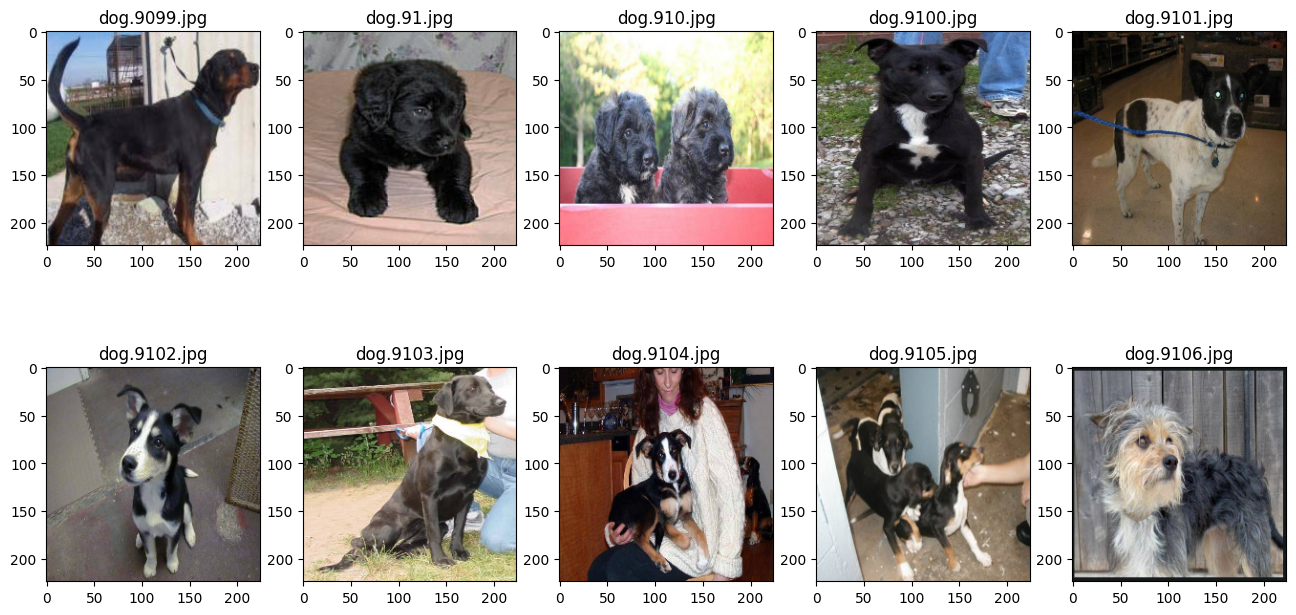

In [23]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16, 8))
for i, path in enumerate(train_files[:10], 1):
    subplot = fig.add_subplot(2, 5, i)
    subplot.set_title('%s' % path.split('/')[-1])
    img = cv2.imread(path)[...,::-1]
    img = cv2.resize(img, IMG_SIZE)
    plt.imshow(img)

## Загружаем предобученную модель

In [24]:
# base_model - объект класса keras.models.Model (Functional Model)
base_model = vgg16.VGG16(weights='imagenet',
                         include_top=False,
                         input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

58889256/58889256 [==============================] - 0s 0us/step


In [25]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## Добавляем полносвязный слой

In [26]:
# фиксируем все веса предобученной сети
for layer in base_model.layers:
    layer.trainable = False

x = base_model.layers[-5].output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1,  # один выход (бинарная классификация)
                          activation='sigmoid',  # функция активации
                          kernel_regularizer=tf.keras.regularizers.l1(1e-4))(x)

model = tf.keras.Model(inputs=base_model.input, outputs=x, name='dogs_vs_cats')

## Выводим архитектуру модели

In [27]:
model.summary()

Model: "dogs_vs_cats"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)      

## Компилируем модель и запускаем обучение

In [28]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # функция потерь binary_crossentropy (log loss
              metrics=['accuracy'])

In [29]:
model.save('models/cats-dogs-vgg16_pretrained.hdf5')

In [8]:
model = tf.keras.models.load_model('models/cats-dogs-vgg16_pretrained.hdf5')

In [9]:
val_samples = 50  # число изображений в валидационной выборке

shuffle(train_files)  # перемешиваем обучающую выборку
validation_data = next(fit_generator(train_files[:val_samples], val_samples))
train_data = fit_generator(train_files[val_samples:])  # данные читаем функцией-генератором

# запускаем процесс обучения
for i in range(10):
    print(i)
    model.fit(train_data,
          steps_per_epoch=10,  # число вызовов генератора за эпоху
          epochs=10,  # число эпох обучения
          validation_data=validation_data)
    model.save('models/cats-dogs-vgg16.hdf5')

Epoch 1/10
10/10 [==============================] - 83s 8s/step - loss: 431.2412 - accuracy: 0.5688 - val_loss: 26.2208 - val_accuracy: 0.8000
Epoch 2/10
10/10 [==============================] - 87s 9s/step - loss: 281.0499 - accuracy: 0.6812 - val_loss: 17.6374 - val_accuracy: 0.8000
Epoch 3/10
10/10 [==============================] - 89s 9s/step - loss: 147.5055 - accuracy: 0.8031 - val_loss: 36.7094 - val_accuracy: 0.6000
Epoch 4/10
10/10 [==============================] - 89s 9s/step - loss: 132.5175 - accuracy: 0.8313 - val_loss: 0.0526 - val_accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 92s 9s/step - loss: 61.2541 - accuracy: 0.8906 - val_loss: 0.0543 - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 89s 9s/step - loss: 61.6567 - accuracy: 0.9062 - val_loss: 0.0557 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 91s 9s/step - loss: 54.5686 - accuracy: 0.8906 - val_loss: 0.0568 - val_accuracy: 1.0000
Epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/10
10/10 [==============================] - 81s 9s/step - loss: 30.3250 - accuracy: 0.9219 - val_loss: 0.0619 - val_accuracy: 1.0000
Epoch 2/10
10/10 [==============================] - 89s 9s/step - loss: 31.3798 - accuracy: 0.9219 - val_loss: 0.0631 - val_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 90s 9s/step - loss: 59.4425 - accuracy: 0.8875 - val_loss: 0.0644 - val_accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 92s 9s/step - loss: 43.8963 - accuracy: 0.9031 - val_loss: 0.0657 - val_accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 89s 9s/step - loss: 47.2962 - accuracy: 0.9094 - val_loss: 0.0672 - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 89s 9s/step - loss: 72.0839 - accuracy: 0.8687 - val_loss: 0.0689 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 90s 9s/step - loss: 44.6975 - accuracy: 0.9219 - val_loss: 0.0705 - val_accuracy: 1.0000
Epoch 8/10
10

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/10
10/10 [==============================] - 82s 9s/step - loss: 85.0714 - accuracy: 0.8938 - val_loss: 0.0788 - val_accuracy: 1.0000
Epoch 2/10
10/10 [==============================] - 91s 9s/step - loss: 55.0461 - accuracy: 0.9250 - val_loss: 0.0802 - val_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 92s 9s/step - loss: 74.4867 - accuracy: 0.9187 - val_loss: 0.0813 - val_accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 90s 9s/step - loss: 44.4247 - accuracy: 0.9406 - val_loss: 0.0823 - val_accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 89s 9s/step - loss: 30.0234 - accuracy: 0.9344 - val_loss: 0.0834 - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 92s 9s/step - loss: 30.2973 - accuracy: 0.9563 - val_loss: 0.0844 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 90s 9s/step - loss: 55.7371 - accuracy: 0.9156 - val_loss: 0.0852 - val_accuracy: 1.0000
Epoch 8/10
10

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/10
10/10 [==============================] - 82s 9s/step - loss: 27.2702 - accuracy: 0.9438 - val_loss: 0.0896 - val_accuracy: 1.0000
Epoch 2/10
10/10 [==============================] - 91s 9s/step - loss: 69.4830 - accuracy: 0.9187 - val_loss: 0.0906 - val_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 89s 9s/step - loss: 44.3998 - accuracy: 0.9406 - val_loss: 81.7487 - val_accuracy: 0.8000
Epoch 4/10
10/10 [==============================] - 90s 9s/step - loss: 42.8250 - accuracy: 0.9375 - val_loss: 0.0924 - val_accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 90s 9s/step - loss: 41.4840 - accuracy: 0.9250 - val_loss: 0.0936 - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 90s 9s/step - loss: 60.5001 - accuracy: 0.9187 - val_loss: 0.0947 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 91s 9s/step - loss: 48.6749 - accuracy: 0.9281 - val_loss: 0.0958 - val_accuracy: 1.0000
Epoch 8/10
1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/10
10/10 [==============================] - 83s 9s/step - loss: 71.8291 - accuracy: 0.9281 - val_loss: 43.7954 - val_accuracy: 0.8000
Epoch 2/10
10/10 [==============================] - 93s 9s/step - loss: 92.0425 - accuracy: 0.9312 - val_loss: 0.1012 - val_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 92s 9s/step - loss: 41.2279 - accuracy: 0.9406 - val_loss: 0.1024 - val_accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 92s 9s/step - loss: 26.2028 - accuracy: 0.9406 - val_loss: 0.1034 - val_accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 104s 11s/step - loss: 46.3183 - accuracy: 0.9375 - val_loss: 0.1044 - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 92s 9s/step - loss: 44.4078 - accuracy: 0.9406 - val_loss: 0.1055 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 93s 9s/step - loss: 75.0340 - accuracy: 0.9094 - val_loss: 0.1066 - val_accuracy: 1.0000
Epoch 8/10

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/10
10/10 [==============================] - 84s 9s/step - loss: 61.4354 - accuracy: 0.9125 - val_loss: 0.1128 - val_accuracy: 1.0000
Epoch 2/10
10/10 [==============================] - 92s 9s/step - loss: 76.0726 - accuracy: 0.9187 - val_loss: 0.1145 - val_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 95s 10s/step - loss: 46.3434 - accuracy: 0.9375 - val_loss: 0.1159 - val_accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 91s 9s/step - loss: 55.1273 - accuracy: 0.9219 - val_loss: 0.1172 - val_accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 92s 9s/step - loss: 117.5429 - accuracy: 0.9000 - val_loss: 0.1183 - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 92s 9s/step - loss: 48.5528 - accuracy: 0.9594 - val_loss: 0.1194 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 92s 9s/step - loss: 25.9151 - accuracy: 0.9531 - val_loss: 0.1203 - val_accuracy: 1.0000
Epoch 8/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/10
10/10 [==============================] - 84s 9s/step - loss: 127.4241 - accuracy: 0.9094 - val_loss: 169.9927 - val_accuracy: 0.8000
Epoch 2/10
10/10 [==============================] - 91s 9s/step - loss: 92.1100 - accuracy: 0.9094 - val_loss: 0.1251 - val_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 91s 9s/step - loss: 42.8922 - accuracy: 0.9469 - val_loss: 0.1264 - val_accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 93s 9s/step - loss: 52.8181 - accuracy: 0.9594 - val_loss: 0.1274 - val_accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 93s 9s/step - loss: 67.6619 - accuracy: 0.9406 - val_loss: 0.1282 - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 91s 9s/step - loss: 86.4991 - accuracy: 0.9438 - val_loss: 0.1289 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 94s 10s/step - loss: 65.9679 - accuracy: 0.9312 - val_loss: 0.1296 - val_accuracy: 1.0000
Epoch 8/1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/10
10/10 [==============================] - 84s 9s/step - loss: 47.6722 - accuracy: 0.9469 - val_loss: 0.1330 - val_accuracy: 1.0000
Epoch 2/10
10/10 [==============================] - 94s 9s/step - loss: 41.5849 - accuracy: 0.9406 - val_loss: 0.1340 - val_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 91s 9s/step - loss: 37.0047 - accuracy: 0.9656 - val_loss: 0.1348 - val_accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 95s 10s/step - loss: 37.6668 - accuracy: 0.9531 - val_loss: 0.1354 - val_accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 91s 9s/step - loss: 27.5472 - accuracy: 0.9688 - val_loss: 118.3967 - val_accuracy: 0.8000
Epoch 6/10
10/10 [==============================] - 94s 10s/step - loss: 41.7302 - accuracy: 0.9500 - val_loss: 0.1369 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 92s 9s/step - loss: 91.2652 - accuracy: 0.9344 - val_loss: 0.1375 - val_accuracy: 1.0000
Epoch 8/1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 4s 381ms/step - loss: 31.4538 - accuracy: 0.9531 - val_loss: 0.1401 - val_accuracy: 1.0000
Epoch 2/10
10/10 [==============================] - 3s 357ms/step - loss: 11.4405 - accuracy: 0.9688 - val_loss: 0.1408 - val_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 3s 323ms/step - loss: 33.5965 - accuracy: 0.9625 - val_loss: 0.1414 - val_accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 4s 438ms/step - loss: 22.6769 - accuracy: 0.9719 - val_loss: 0.1421 - val_accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 2s 165ms/step - loss: 18.8078 - accuracy: 0.9625 - val_loss: 0.1426 - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 2s 263ms/step - loss: 32.2927 - accuracy: 0.9625 - val_loss: 0.1433 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 3s 312ms/step - loss: 32.2662 - accuracy: 0.9688 - val_loss: 0.1439 - val_accuracy: 1.0000
Epoch 8/10

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/10
10/10 [==============================] - 4s 321ms/step - loss: 30.2842 - accuracy: 0.9719 - val_loss: 0.1463 - val_accuracy: 1.0000
Epoch 2/10
10/10 [==============================] - 3s 341ms/step - loss: 46.3542 - accuracy: 0.9625 - val_loss: 0.1467 - val_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 3s 366ms/step - loss: 33.9556 - accuracy: 0.9719 - val_loss: 0.1473 - val_accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 4s 405ms/step - loss: 41.4995 - accuracy: 0.9563 - val_loss: 119.9810 - val_accuracy: 0.8000
Epoch 5/10
10/10 [==============================] - 3s 318ms/step - loss: 55.3007 - accuracy: 0.9531 - val_loss: 0.1486 - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 3s 280ms/step - loss: 28.7124 - accuracy: 0.9688 - val_loss: 0.1493 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 3s 323ms/step - loss: 33.2079 - accuracy: 0.9625 - val_loss: 0.1499 - val_accuracy: 1.00

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('models/cats-dogs-vgg16.hdf5')

In [ ]:
model = tf.keras.models.load_model('models/cats-dogs-vgg16.hdf5')

In [ ]:
val_samples = 50  # число изображений в валидационной выборке

shuffle(train_files)  # перемешиваем обучающую выборку
validation_data = next(fit_generator(train_files[:val_samples], val_samples))
train_data = fit_generator(train_files[val_samples:])  # данные читаем функцией-генератором

# запускаем процесс обучения
for i in range(10):
    model.fit(train_data,
          steps_per_epoch=10,  # число вызовов генератора за эпоху
          epochs=10,  # число эпох обучения
          validation_data=validation_data)
    model.save('models/cats-dogs-vgg16.hdf5')

Epoch 1/10
10/10 [==============================] - 83s 8s/step - loss: 431.2412 - accuracy: 0.5688 - val_loss: 26.2208 - val_accuracy: 0.8000
Epoch 2/10
10/10 [==============================] - 87s 9s/step - loss: 281.0499 - accuracy: 0.6812 - val_loss: 17.6374 - val_accuracy: 0.8000
Epoch 3/10
10/10 [==============================] - 89s 9s/step - loss: 147.5055 - accuracy: 0.8031 - val_loss: 36.7094 - val_accuracy: 0.6000
Epoch 4/10
10/10 [==============================] - 89s 9s/step - loss: 132.5175 - accuracy: 0.8313 - val_loss: 0.0526 - val_accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 92s 9s/step - loss: 61.2541 - accuracy: 0.8906 - val_loss: 0.0543 - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 89s 9s/step - loss: 61.6567 - accuracy: 0.9062 - val_loss: 0.0557 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 91s 9s/step - loss: 54.5686 - accuracy: 0.8906 - val_loss: 0.0568 - val_accuracy: 1.0000
Epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/10
10/10 [==============================] - 81s 9s/step - loss: 30.3250 - accuracy: 0.9219 - val_loss: 0.0619 - val_accuracy: 1.0000
Epoch 2/10
10/10 [==============================] - 89s 9s/step - loss: 31.3798 - accuracy: 0.9219 - val_loss: 0.0631 - val_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 90s 9s/step - loss: 59.4425 - accuracy: 0.8875 - val_loss: 0.0644 - val_accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 92s 9s/step - loss: 43.8963 - accuracy: 0.9031 - val_loss: 0.0657 - val_accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 89s 9s/step - loss: 47.2962 - accuracy: 0.9094 - val_loss: 0.0672 - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 89s 9s/step - loss: 72.0839 - accuracy: 0.8687 - val_loss: 0.0689 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 90s 9s/step - loss: 44.6975 - accuracy: 0.9219 - val_loss: 0.0705 - val_accuracy: 1.0000
Epoch 8/10


## Предсказания на проверочной выборке

In [10]:
test_pred = model.predict(
    predict_generator(test_files), steps=len(test_files))

12500/12500 [==============================] - 3662s 293ms/step


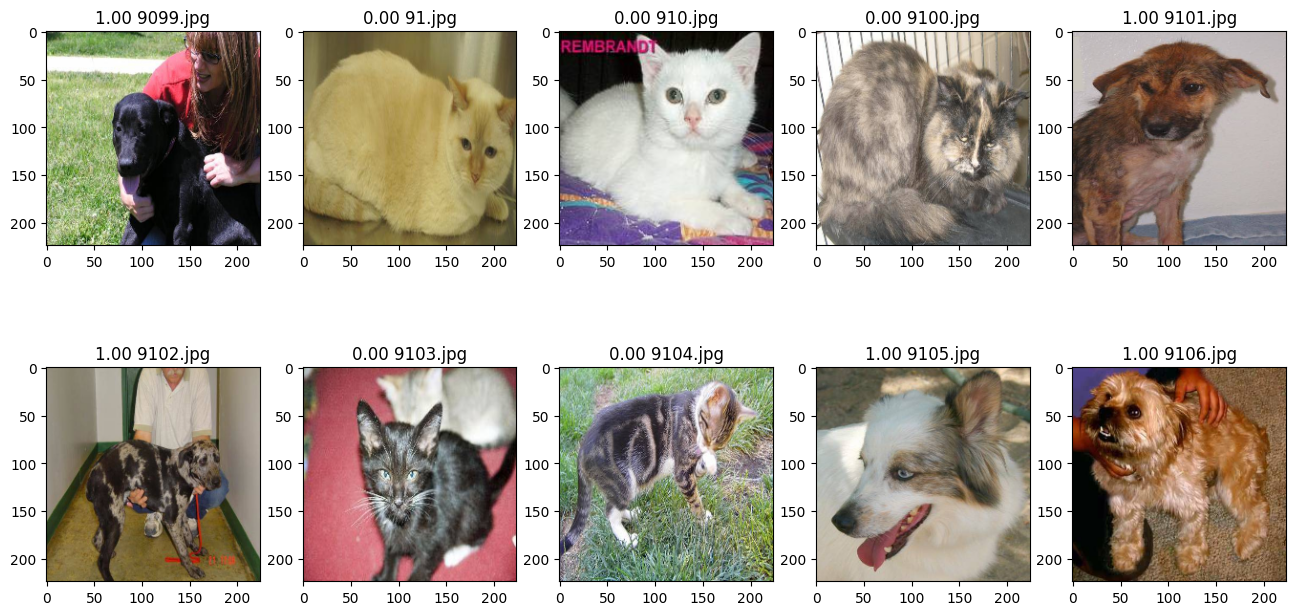

In [11]:
fig = plt.figure(figsize=(16, 8))
for i, (path, score) in enumerate(zip(test_files[:10], test_pred[:10]), 1):
    subplot = fig.add_subplot(2, 5, i)
    subplot.set_title('%.2f %s' % (score, os.path.basename(path)))
    img = cv2.imread(path)[...,::-1]
    img = cv2.resize(img, IMG_SIZE)
    subplot.imshow(img)

## Готовим данные для отправки

In [13]:
import re

with open('submit.csv', 'w') as dst:
    dst.write('id,label\n')
    for path, score in zip(test_files, test_pred):
        dst.write('%s,%f\n' % (re.search('(\d+).jpg$', path).group(1), score))

In [ ]:
# LogLoss = 1.04979

после проведения нескольких пробных обучений обнаружилось, что на цпу считать долго, а время гпу и тпу быстро закончилось. значит будем искать максимально быстрые алгоритмы, нормально работающие на цпу

# MobileNetV2

## Загружаем предобученную модель

In [20]:
# base_model - объект класса keras.models.Model (Functional Model)
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

name = 'mobnet2'
base_model = MobileNetV2(
    # input_shape=None,
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)
    ,alpha=1.0,
    include_top=False,
    weights='imagenet',
    # input_tensor=None,
    pooling=None,
    # classes=1000,
    # classifier_activation='softmax',
    )

In [21]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

## Добавляем полносвязный слой

In [22]:
# фиксируем все веса предобученной сети
for layer in base_model.layers:
    layer.trainable = False

x = base_model.layers[-5].output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1,  # один выход (бинарная классификация)
                          activation='sigmoid',  # функция активации
                          kernel_regularizer=tf.keras.regularizers.l1(1e-4))(x)

model = tf.keras.Model(inputs=base_model.input, outputs=x, name='dogs_vs_cats')

## Выводим архитектуру модели

In [23]:
model.summary()

Model: "dogs_vs_cats"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]'] 

## Компилируем модель и запускаем обучение

In [25]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # функция потерь binary_crossentropy (log loss
              metrics=['accuracy'])

In [26]:
model.save('models/cats-dogs-mobnet2_pretrained.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
model = tf.keras.models.load_model('models/cats-dogs-mobnet2_pretrained.hdf5')

In [29]:
val_samples = 50  # число изображений в валидационной выборке

shuffle(train_files)  # перемешиваем обучающую выборку
validation_data = next(fit_generator(train_files[:val_samples], val_samples))
train_data = fit_generator(train_files[val_samples:])  # данные читаем функцией-генератором

# запускаем процесс обучения
for i in range(10):
    print(i)
    model.fit(train_data,
          steps_per_epoch=10,  # число вызовов генератора за эпоху
          epochs=10,  # число эпох обучения
          validation_data=validation_data)
    model.save('models/cats-dogs-mobnet2.hdf5')

0
Epoch 1/10
10/10 [==============================] - 104s 11s/step - loss: 2.7852 - accuracy: 0.4875 - val_loss: 1.6027 - val_accuracy: 0.5400
Epoch 2/10
10/10 [==============================] - 107s 11s/step - loss: 1.2004 - accuracy: 0.5562 - val_loss: 0.6325 - val_accuracy: 0.6400
Epoch 3/10
10/10 [==============================] - 111s 12s/step - loss: 0.6099 - accuracy: 0.6656 - val_loss: 0.6692 - val_accuracy: 0.6400
Epoch 4/10
10/10 [==============================] - 102s 11s/step - loss: 0.5418 - accuracy: 0.7375 - val_loss: 0.5225 - val_accuracy: 0.7600
Epoch 5/10
10/10 [==============================] - 108s 11s/step - loss: 0.4886 - accuracy: 0.7781 - val_loss: 0.5281 - val_accuracy: 0.7400
Epoch 6/10
10/10 [==============================] - 114s 12s/step - loss: 0.4754 - accuracy: 0.7875 - val_loss: 0.4693 - val_accuracy: 0.8200
Epoch 7/10
10/10 [==============================] - 106s 11s/step - loss: 0.4072 - accuracy: 0.8438 - val_loss: 0.4525 - val_accuracy: 0.8000
Epoc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1
Epoch 1/10
10/10 [==============================] - 100s 11s/step - loss: 0.3742 - accuracy: 0.8594 - val_loss: 0.4306 - val_accuracy: 0.8400
Epoch 2/10
10/10 [==============================] - 104s 11s/step - loss: 0.4979 - accuracy: 0.7563 - val_loss: 0.4029 - val_accuracy: 0.8000
Epoch 3/10
10/10 [==============================] - 107s 11s/step - loss: 0.4386 - accuracy: 0.7906 - val_loss: 0.3867 - val_accuracy: 0.8400
Epoch 4/10
10/10 [==============================] - 109s 11s/step - loss: 0.4697 - accuracy: 0.8062 - val_loss: 0.6970 - val_accuracy: 0.6200
Epoch 5/10
10/10 [==============================] - 109s 11s/step - loss: 0.4725 - accuracy: 0.7781 - val_loss: 0.3881 - val_accuracy: 0.8600
Epoch 6/10
10/10 [==============================] - 97s 10s/step - loss: 0.4223 - accuracy: 0.8188 - val_loss: 0.4123 - val_accuracy: 0.7800
Epoch 7/10
10/10 [==============================] - 102s 11s/step - loss: 0.4511 - accuracy: 0.8125 - val_loss: 0.4055 - val_accuracy: 0.8400
Epoch

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2
Epoch 1/10
10/10 [==============================] - 99s 11s/step - loss: 0.3703 - accuracy: 0.8406 - val_loss: 0.4401 - val_accuracy: 0.8400
Epoch 2/10
10/10 [==============================] - 107s 11s/step - loss: 0.4632 - accuracy: 0.8188 - val_loss: 0.7003 - val_accuracy: 0.6600
Epoch 3/10
10/10 [==============================] - 105s 11s/step - loss: 0.3806 - accuracy: 0.8156 - val_loss: 0.3969 - val_accuracy: 0.8600
Epoch 4/10
10/10 [==============================] - 104s 11s/step - loss: 0.3532 - accuracy: 0.8375 - val_loss: 0.5658 - val_accuracy: 0.7400
Epoch 5/10
10/10 [==============================] - 103s 10s/step - loss: 0.4520 - accuracy: 0.8219 - val_loss: 0.5267 - val_accuracy: 0.7600
Epoch 6/10
10/10 [==============================] - 106s 11s/step - loss: 0.4183 - accuracy: 0.8156 - val_loss: 0.5058 - val_accuracy: 0.8000
Epoch 7/10
10/10 [==============================] - 110s 11s/step - loss: 0.4045 - accuracy: 0.8313 - val_loss: 0.4541 - val_accuracy: 0.8400
Epoch

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3
Epoch 1/10
10/10 [==============================] - 101s 11s/step - loss: 0.4318 - accuracy: 0.8375 - val_loss: 0.9057 - val_accuracy: 0.6000
Epoch 2/10
10/10 [==============================] - 104s 11s/step - loss: 0.5895 - accuracy: 0.7688 - val_loss: 0.5332 - val_accuracy: 0.8400
Epoch 3/10
10/10 [==============================] - 102s 11s/step - loss: 0.4318 - accuracy: 0.7937 - val_loss: 0.4416 - val_accuracy: 0.8200
Epoch 4/10
10/10 [==============================] - 97s 10s/step - loss: 0.4325 - accuracy: 0.8156 - val_loss: 0.4776 - val_accuracy: 0.8600
Epoch 5/10
10/10 [==============================] - 96s 10s/step - loss: 0.6389 - accuracy: 0.7531 - val_loss: 0.3991 - val_accuracy: 0.8600
Epoch 6/10
10/10 [==============================] - 98s 10s/step - loss: 0.5997 - accuracy: 0.7688 - val_loss: 0.5434 - val_accuracy: 0.7600
Epoch 7/10
10/10 [==============================] - 100s 11s/step - loss: 0.7148 - accuracy: 0.7156 - val_loss: 0.4215 - val_accuracy: 0.8400
Epoch 8

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4
Epoch 1/10
10/10 [==============================] - 94s 10s/step - loss: 0.3689 - accuracy: 0.8469 - val_loss: 0.4122 - val_accuracy: 0.8000
Epoch 2/10
10/10 [==============================] - 101s 10s/step - loss: 0.3237 - accuracy: 0.8656 - val_loss: 0.3961 - val_accuracy: 0.8600
Epoch 3/10
10/10 [==============================] - 96s 10s/step - loss: 0.4100 - accuracy: 0.8313 - val_loss: 0.4069 - val_accuracy: 0.8200
Epoch 4/10
10/10 [==============================] - 98s 10s/step - loss: 0.5571 - accuracy: 0.8031 - val_loss: 0.5392 - val_accuracy: 0.7800
Epoch 5/10
10/10 [==============================] - 100s 10s/step - loss: 0.3634 - accuracy: 0.8562 - val_loss: 0.4672 - val_accuracy: 0.8000
Epoch 6/10
10/10 [==============================] - 98s 10s/step - loss: 0.3415 - accuracy: 0.8562 - val_loss: 0.4524 - val_accuracy: 0.8600
Epoch 7/10
10/10 [==============================] - 97s 10s/step - loss: 0.3762 - accuracy: 0.8500 - val_loss: 0.4666 - val_accuracy: 0.8000
Epoch 8/1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5
Epoch 1/10
10/10 [==============================] - 93s 10s/step - loss: 0.4233 - accuracy: 0.8438 - val_loss: 0.5361 - val_accuracy: 0.7800
Epoch 2/10
10/10 [==============================] - 101s 10s/step - loss: 0.3883 - accuracy: 0.8562 - val_loss: 0.4257 - val_accuracy: 0.8600
Epoch 3/10
10/10 [==============================] - 91s 10s/step - loss: 0.3248 - accuracy: 0.8813 - val_loss: 0.3974 - val_accuracy: 0.8600
Epoch 4/10
10/10 [==============================] - 98s 10s/step - loss: 0.3582 - accuracy: 0.8562 - val_loss: 0.4602 - val_accuracy: 0.8000
Epoch 5/10
10/10 [==============================] - 100s 10s/step - loss: 0.3510 - accuracy: 0.8719 - val_loss: 0.4144 - val_accuracy: 0.8400
Epoch 6/10
10/10 [==============================] - 91s 10s/step - loss: 0.3579 - accuracy: 0.8531 - val_loss: 0.3766 - val_accuracy: 0.8600
Epoch 7/10
10/10 [==============================] - 104s 10s/step - loss: 0.4208 - accuracy: 0.8406 - val_loss: 0.4280 - val_accuracy: 0.8400
Epoch 8/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6
Epoch 1/10
10/10 [==============================] - 86s 9s/step - loss: 0.4042 - accuracy: 0.8406 - val_loss: 0.5030 - val_accuracy: 0.7800
Epoch 2/10
10/10 [==============================] - 94s 9s/step - loss: 0.3625 - accuracy: 0.8562 - val_loss: 0.4553 - val_accuracy: 0.8400
Epoch 3/10
10/10 [==============================] - 106s 11s/step - loss: 0.3794 - accuracy: 0.8531 - val_loss: 0.4032 - val_accuracy: 0.8800
Epoch 4/10
10/10 [==============================] - 91s 9s/step - loss: 0.4121 - accuracy: 0.8406 - val_loss: 0.8123 - val_accuracy: 0.6800
Epoch 5/10
10/10 [==============================] - 91s 9s/step - loss: 0.4069 - accuracy: 0.8250 - val_loss: 0.5089 - val_accuracy: 0.8400
Epoch 6/10
10/10 [==============================] - 89s 9s/step - loss: 0.4000 - accuracy: 0.8313 - val_loss: 0.3644 - val_accuracy: 0.8800
Epoch 7/10
10/10 [==============================] - 91s 9s/step - loss: 0.4024 - accuracy: 0.8344 - val_loss: 0.3581 - val_accuracy: 0.8800
Epoch 8/10
10/10

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7
Epoch 1/10
10/10 [==============================] - 89s 10s/step - loss: 0.5498 - accuracy: 0.8156 - val_loss: 0.4893 - val_accuracy: 0.8600
Epoch 2/10
10/10 [==============================] - 89s 9s/step - loss: 0.3660 - accuracy: 0.8687 - val_loss: 0.3669 - val_accuracy: 0.8600
Epoch 3/10
10/10 [==============================] - 91s 10s/step - loss: 0.3871 - accuracy: 0.8562 - val_loss: 0.5221 - val_accuracy: 0.7800
Epoch 4/10
10/10 [==============================] - 85s 9s/step - loss: 0.5315 - accuracy: 0.7969 - val_loss: 0.3911 - val_accuracy: 0.8800
Epoch 5/10
10/10 [==============================] - 99s 10s/step - loss: 0.4688 - accuracy: 0.8125 - val_loss: 0.8691 - val_accuracy: 0.6400
Epoch 6/10
10/10 [==============================] - 92s 10s/step - loss: 0.5866 - accuracy: 0.7656 - val_loss: 0.5064 - val_accuracy: 0.8600
Epoch 7/10
10/10 [==============================] - 83s 9s/step - loss: 0.6003 - accuracy: 0.8062 - val_loss: 0.5773 - val_accuracy: 0.7200
Epoch 8/10
10/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8
Epoch 1/10
10/10 [==============================] - 27s 3s/step - loss: 0.3709 - accuracy: 0.8406 - val_loss: 0.4028 - val_accuracy: 0.8200
Epoch 2/10
10/10 [==============================] - 26s 3s/step - loss: 0.3254 - accuracy: 0.8625 - val_loss: 0.4356 - val_accuracy: 0.7800
Epoch 3/10
10/10 [==============================] - 26s 3s/step - loss: 0.3408 - accuracy: 0.8500 - val_loss: 0.4224 - val_accuracy: 0.8000
Epoch 4/10
10/10 [==============================] - 22s 2s/step - loss: 0.3379 - accuracy: 0.8656 - val_loss: 0.3811 - val_accuracy: 0.8800
Epoch 5/10
10/10 [==============================] - 22s 2s/step - loss: 0.2855 - accuracy: 0.8906 - val_loss: 0.4735 - val_accuracy: 0.8000
Epoch 6/10
10/10 [==============================] - 27s 3s/step - loss: 0.3677 - accuracy: 0.8344 - val_loss: 0.4956 - val_accuracy: 0.7400
Epoch 7/10
10/10 [==============================] - 23s 2s/step - loss: 0.2838 - accuracy: 0.8844 - val_loss: 0.4420 - val_accuracy: 0.9000
Epoch 8/10
10/10 [

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9
Epoch 1/10
10/10 [==============================] - 23s 2s/step - loss: 0.4833 - accuracy: 0.8062 - val_loss: 0.9356 - val_accuracy: 0.6600
Epoch 2/10
10/10 [==============================] - 27s 3s/step - loss: 0.5821 - accuracy: 0.8250 - val_loss: 0.4404 - val_accuracy: 0.9000
Epoch 3/10
10/10 [==============================] - 21s 2s/step - loss: 0.4972 - accuracy: 0.8125 - val_loss: 0.4755 - val_accuracy: 0.9000
Epoch 4/10
10/10 [==============================] - 23s 2s/step - loss: 0.4195 - accuracy: 0.8531 - val_loss: 0.7374 - val_accuracy: 0.6800
Epoch 5/10
10/10 [==============================] - 25s 3s/step - loss: 0.4432 - accuracy: 0.8375 - val_loss: 0.3988 - val_accuracy: 0.8600
Epoch 6/10
10/10 [==============================] - 23s 2s/step - loss: 0.5555 - accuracy: 0.8125 - val_loss: 0.5353 - val_accuracy: 0.8600
Epoch 7/10
10/10 [==============================] - 22s 2s/step - loss: 0.3538 - accuracy: 0.8594 - val_loss: 0.5778 - val_accuracy: 0.7000
Epoch 8/10
10/10 [

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
model.save('models/cats-dogs-mobnet2.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
model = tf.keras.models.load_model('models/cats-dogs-mobnet2.hdf5')

## Предсказания на проверочной выборке

In [13]:
test_pred = model.predict(
    predict_generator(test_files), steps=len(test_files))

12500/12500 [==============================] - 3377s 270ms/step


In [ ]:
fig = plt.figure(figsize=(16, 8))
for i, (path, score) in enumerate(zip(test_files[:10], test_pred[:10]), 1):
    subplot = fig.add_subplot(2, 5, i)
    subplot.set_title('%.2f %s' % (score, os.path.basename(path)))
    img = cv2.imread(path)[...,::-1]
    img = cv2.resize(img, IMG_SIZE)
    subplot.imshow(img)

## Готовим данные для отправки

In [20]:
import re

f_path = f'data/final/submit_{name}.csv'
with open(f_path, 'w') as dst:
    dst.write('id,label\n')
    for path, score in zip(test_files, test_pred):
        dst.write('%s,%f\n' % (re.search('(\d+).jpg$', path).group(1), score))

In [18]:
!kaggle competitions submit -c dogs-vs-cats-redux-kernels-edition -f data/final/submit_mobnet2.csv -m "mobnet2"

100% 172k/172k [00:02<00:00, 70.6kB/s] 
Successfully submitted to Dogs vs. Cats Redux: Kernels Edition

In [ ]:
# submit_mobnet2.csv

# Complete (after deadline) · 2m to go

# Score: 0.35613

#Xception

In [23]:
from keras.applications import Xception

## Загружаем предобученную модель

In [24]:
# base_model - объект класса keras.models.Model (Functional Model)
name = 'xcept'
base_model = Xception(
    # input_shape=None,
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)
    ,include_top=False,
    weights='imagenet',
    # input_tensor=None,
    pooling=None,
    # classes=1000,
    # classifier_activation='softmax',
    )

83683744/83683744 [==============================] - 1s 0us/step


In [25]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 111, 111, 32)         0         ['block1_conv1_bn[0][0]

## Добавляем полносвязный слой

In [26]:
# фиксируем все веса предобученной сети
for layer in base_model.layers:
    layer.trainable = False

x = base_model.layers[-1].output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256,activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(1,  # один выход (бинарная классификация)
                          activation='sigmoid',  # функция активации
                          kernel_regularizer=tf.keras.regularizers.l1(1e-4))(x)

model = tf.keras.Model(inputs=base_model.input, outputs=x, name='dogs_vs_cats')

## Выводим архитектуру модели

In [27]:
model.summary()

Model: "dogs_vs_cats"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 111, 111, 32)         0         ['block1_conv1_bn[0

## Компилируем модель и запускаем обучение

In [28]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # функция потерь binary_crossentropy (log loss
              metrics=['accuracy'])

In [29]:
model.save(f'models/cats-dogs-{name}_pretrained.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
model = tf.keras.models.load_model(f'models/cats-dogs-{name}_pretrained.hdf5')

In [32]:
val_samples = 50  # число изображений в валидационной выборке

shuffle(train_files)  # перемешиваем обучающую выборку
validation_data = next(fit_generator(train_files[:val_samples], val_samples))
train_data = fit_generator(train_files[val_samples:])  # данные читаем функцией-генератором


In [33]:

# запускаем процесс обучения
for i in range(10):
    print(i)
    model.fit(train_data,
          steps_per_epoch=10,  # число вызовов генератора за эпоху
          epochs=10,  # число эпох обучения
          validation_data=validation_data)
    model.save(f'models/cats-dogs-{name}.hdf5')

0
Epoch 1/10
10/10 [==============================] - 132s 14s/step - loss: 27.0500 - accuracy: 0.5500 - val_loss: 29.6963 - val_accuracy: 0.5200
Epoch 2/10
10/10 [==============================] - 108s 11s/step - loss: 15.0155 - accuracy: 0.5781 - val_loss: 20.5689 - val_accuracy: 0.5600
Epoch 3/10
10/10 [==============================] - 113s 11s/step - loss: 13.6413 - accuracy: 0.5562 - val_loss: 8.3215 - val_accuracy: 0.6200
Epoch 4/10
10/10 [==============================] - 111s 11s/step - loss: 3.5753 - accuracy: 0.6625 - val_loss: 5.8997 - val_accuracy: 0.6800
Epoch 5/10
10/10 [==============================] - 114s 12s/step - loss: 2.1006 - accuracy: 0.5719 - val_loss: 2.6086 - val_accuracy: 0.5800
Epoch 6/10
10/10 [==============================] - 110s 11s/step - loss: 1.5281 - accuracy: 0.4969 - val_loss: 1.4189 - val_accuracy: 0.6000
Epoch 7/10
10/10 [==============================] - 106s 11s/step - loss: 0.9237 - accuracy: 0.5312 - val_loss: 2.2862 - val_accuracy: 0.6200

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1
Epoch 1/10
 5/10 [==============>...............] - ETA: 55s - loss: 1.7822 - accuracy: 0.5562 

KeyboardInterrupt: ignored

In [ ]:
model.save(f'models/cats-dogs-{name}.hdf5')

In [ ]:
model = tf.keras.models.load_model(f'models/cats-dogs-{name}.hdf5')

## Предсказания на проверочной выборке

In [ ]:
test_pred = model.predict(
    predict_generator(test_files), steps=len(test_files))

 9874/12500 [======================>.......] - ETA: 11:49

In [ ]:
fig = plt.figure(figsize=(16, 8))
for i, (path, score) in enumerate(zip(test_files[:10], test_pred[:10]), 1):
    subplot = fig.add_subplot(2, 5, i)
    subplot.set_title('%.2f %s' % (score, os.path.basename(path)))
    img = cv2.imread(path)[...,::-1]
    img = cv2.resize(img, IMG_SIZE)
    subplot.imshow(img)

## Готовим данные для отправки

In [ ]:
import re

f_path = f'data/final/submit_{name}.csv'
with open(f_path, 'w') as dst:
    dst.write('id,label\n')
    for path, score in zip(test_files, test_pred):
        dst.write('%s,%f\n' % (re.search('(\d+).jpg$', path).group(1), score))

In [ ]:
!kaggle competitions submit -c dogs-vs-cats-redux-kernels-edition -f data/final/submit_xcept.csv -m "xcept"

100% 172k/172k [00:02<00:00, 70.6kB/s] 
Successfully submitted to Dogs vs. Cats Redux: Kernels Edition

In [ ]:
# LogLoss = 1.04979

# MobileNetV2_2

## Загружаем предобученную модель

In [17]:
# base_model - объект класса keras.models.Model (Functional Model)
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

name = 'mobnet2_2'
base_model = MobileNetV2(
    # input_shape=None,
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)
    ,alpha=1.0,
    include_top=False,
    weights='imagenet',
    # input_tensor=None,
    pooling=None,
    # classes=1000,
    # classifier_activation='softmax',
    )

9406464/9406464 [==============================] - 0s 0us/step


In [35]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

## Добавляем полносвязный слой

In [18]:
# фиксируем все веса предобученной сети
for layer in base_model.layers:
    layer.trainable = False

x = base_model.layers[-1].output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256,activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(1,  # один выход (бинарная классификация)
                          activation='sigmoid',  # функция активации
                          kernel_regularizer=tf.keras.regularizers.l1(1e-4))(x)

model = tf.keras.Model(inputs=base_model.input, outputs=x, name='dogs_vs_cats')

## Выводим архитектуру модели

In [37]:
model.summary()

Model: "dogs_vs_cats"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]'] 

## Компилируем модель и запускаем обучение

In [38]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # функция потерь binary_crossentropy (log loss
              metrics=['accuracy'])

In [39]:
model.save(f'models/cats-dogs-{name}_pretrained.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
model = tf.keras.models.load_model(f'models/cats-dogs-{name}_pretrained.hdf5')

In [41]:
val_samples = 50  # число изображений в валидационной выборке

shuffle(train_files)  # перемешиваем обучающую выборку
validation_data = next(fit_generator(train_files[:val_samples], val_samples))
train_data = fit_generator(train_files[val_samples:])  # данные читаем функцией-генератором


In [42]:

# запускаем процесс обучения
for i in range(10):
    print(i)
    model.fit(train_data,
          steps_per_epoch=10,  # число вызовов генератора за эпоху
          epochs=10,  # число эпох обучения
          validation_data=validation_data)
    model.save(f'models/cats-dogs-{name}-{i}.hdf5')

0
Epoch 1/10
10/10 [==============================] - 86s 9s/step - loss: 13.0831 - accuracy: 0.5500 - val_loss: 8.5898 - val_accuracy: 0.5600
Epoch 2/10
10/10 [==============================] - 88s 9s/step - loss: 5.3589 - accuracy: 0.6969 - val_loss: 1.2946 - val_accuracy: 0.8200
Epoch 3/10
10/10 [==============================] - 86s 9s/step - loss: 2.3990 - accuracy: 0.7219 - val_loss: 0.9090 - val_accuracy: 0.8200
Epoch 4/10
10/10 [==============================] - 82s 9s/step - loss: 0.9648 - accuracy: 0.7781 - val_loss: 0.4086 - val_accuracy: 0.8200
Epoch 5/10
10/10 [==============================] - 92s 10s/step - loss: 0.6192 - accuracy: 0.7281 - val_loss: 0.4347 - val_accuracy: 0.7600
Epoch 6/10
10/10 [==============================] - 94s 10s/step - loss: 0.4709 - accuracy: 0.7563 - val_loss: 0.3637 - val_accuracy: 0.8400
Epoch 7/10
10/10 [==============================] - 95s 10s/step - loss: 0.4706 - accuracy: 0.7781 - val_loss: 0.3534 - val_accuracy: 0.8200
Epoch 8/10
10/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1
Epoch 1/10
10/10 [==============================] - 80s 9s/step - loss: 0.4621 - accuracy: 0.7656 - val_loss: 0.3157 - val_accuracy: 0.8800
Epoch 2/10
10/10 [==============================] - 84s 9s/step - loss: 0.4569 - accuracy: 0.7812 - val_loss: 0.3504 - val_accuracy: 0.8600
Epoch 3/10
10/10 [==============================] - 89s 9s/step - loss: 0.4578 - accuracy: 0.7906 - val_loss: 0.3393 - val_accuracy: 0.8800
Epoch 4/10
10/10 [==============================] - 86s 9s/step - loss: 0.4666 - accuracy: 0.7563 - val_loss: 0.3629 - val_accuracy: 0.8200
Epoch 5/10
10/10 [==============================] - 85s 9s/step - loss: 0.4482 - accuracy: 0.7937 - val_loss: 0.3453 - val_accuracy: 0.8600
Epoch 6/10
10/10 [==============================] - 88s 9s/step - loss: 0.4273 - accuracy: 0.7937 - val_loss: 0.3440 - val_accuracy: 0.8800
Epoch 7/10
10/10 [==============================] - 84s 9s/step - loss: 0.4373 - accuracy: 0.8000 - val_loss: 0.4481 - val_accuracy: 0.8200
Epoch 8/10
10/10 [

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2
Epoch 1/10
10/10 [==============================] - 79s 8s/step - loss: 0.4269 - accuracy: 0.7875 - val_loss: 0.2961 - val_accuracy: 0.8800
Epoch 2/10
10/10 [==============================] - 84s 9s/step - loss: 0.4581 - accuracy: 0.8031 - val_loss: 0.3246 - val_accuracy: 0.8800
Epoch 3/10
10/10 [==============================] - 83s 9s/step - loss: 0.4388 - accuracy: 0.8062 - val_loss: 0.2913 - val_accuracy: 0.9000
Epoch 4/10
10/10 [==============================] - 87s 9s/step - loss: 0.4111 - accuracy: 0.8031 - val_loss: 0.3030 - val_accuracy: 0.9000
Epoch 5/10
10/10 [==============================] - 91s 10s/step - loss: 0.4229 - accuracy: 0.7719 - val_loss: 0.3087 - val_accuracy: 0.8800
Epoch 6/10
10/10 [==============================] - 84s 9s/step - loss: 0.3987 - accuracy: 0.8313 - val_loss: 0.2867 - val_accuracy: 0.8800
Epoch 7/10
10/10 [==============================] - 87s 9s/step - loss: 0.3590 - accuracy: 0.8438 - val_loss: 0.2650 - val_accuracy: 0.8800
Epoch 8/10
10/10 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3
Epoch 1/10
10/10 [==============================] - 84s 9s/step - loss: 0.4248 - accuracy: 0.8031 - val_loss: 0.3249 - val_accuracy: 0.8400
Epoch 2/10
10/10 [==============================] - 85s 9s/step - loss: 0.4211 - accuracy: 0.8031 - val_loss: 0.3004 - val_accuracy: 0.8800
Epoch 3/10
10/10 [==============================] - 90s 9s/step - loss: 0.4346 - accuracy: 0.7875 - val_loss: 0.3116 - val_accuracy: 0.8200
Epoch 4/10
10/10 [==============================] - 84s 9s/step - loss: 0.3985 - accuracy: 0.8281 - val_loss: 0.3032 - val_accuracy: 0.8800
Epoch 5/10
10/10 [==============================] - 85s 9s/step - loss: 0.4090 - accuracy: 0.7937 - val_loss: 0.3128 - val_accuracy: 0.8400
Epoch 6/10
10/10 [==============================] - 87s 9s/step - loss: 0.4044 - accuracy: 0.8313 - val_loss: 0.3086 - val_accuracy: 0.8600
Epoch 7/10
10/10 [==============================] - 83s 9s/step - loss: 0.4205 - accuracy: 0.8062 - val_loss: 0.2708 - val_accuracy: 0.8600
Epoch 8/10
10/10 [

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4
Epoch 1/10
10/10 [==============================] - 79s 9s/step - loss: 0.4921 - accuracy: 0.7781 - val_loss: 0.2802 - val_accuracy: 0.8600
Epoch 2/10
10/10 [==============================] - 86s 9s/step - loss: 0.4496 - accuracy: 0.7781 - val_loss: 0.3280 - val_accuracy: 0.8800
Epoch 3/10
10/10 [==============================] - 84s 9s/step - loss: 0.4042 - accuracy: 0.7937 - val_loss: 0.2822 - val_accuracy: 0.8600
Epoch 4/10
10/10 [==============================] - 91s 10s/step - loss: 0.4064 - accuracy: 0.8438 - val_loss: 0.2589 - val_accuracy: 0.8400
Epoch 5/10
10/10 [==============================] - 79s 9s/step - loss: 0.3944 - accuracy: 0.8125 - val_loss: 0.2575 - val_accuracy: 0.8800
Epoch 6/10
10/10 [==============================] - 81s 9s/step - loss: 0.4385 - accuracy: 0.8188 - val_loss: 0.2619 - val_accuracy: 0.9000
Epoch 7/10
10/10 [==============================] - 86s 9s/step - loss: 0.4179 - accuracy: 0.8062 - val_loss: 0.3187 - val_accuracy: 0.8200
Epoch 8/10
10/10 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5
Epoch 1/10
10/10 [==============================] - 86s 9s/step - loss: 0.3805 - accuracy: 0.8313 - val_loss: 0.2981 - val_accuracy: 0.8800
Epoch 2/10
10/10 [==============================] - 79s 8s/step - loss: 0.4243 - accuracy: 0.7875 - val_loss: 0.2953 - val_accuracy: 0.8800
Epoch 3/10
10/10 [==============================] - 88s 9s/step - loss: 0.3769 - accuracy: 0.8188 - val_loss: 0.2663 - val_accuracy: 0.8800
Epoch 4/10
10/10 [==============================] - 80s 9s/step - loss: 0.3612 - accuracy: 0.8219 - val_loss: 0.2696 - val_accuracy: 0.8600
Epoch 5/10
10/10 [==============================] - 90s 10s/step - loss: 0.4026 - accuracy: 0.7750 - val_loss: 0.2748 - val_accuracy: 0.9000
Epoch 6/10
10/10 [==============================] - 80s 9s/step - loss: 0.4050 - accuracy: 0.8156 - val_loss: 0.2720 - val_accuracy: 0.9000
Epoch 7/10
10/10 [==============================] - 89s 9s/step - loss: 0.4151 - accuracy: 0.8094 - val_loss: 0.2888 - val_accuracy: 0.8800
Epoch 8/10
10/10 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6
Epoch 1/10
10/10 [==============================] - 83s 9s/step - loss: 0.4005 - accuracy: 0.8062 - val_loss: 0.3064 - val_accuracy: 0.8600
Epoch 2/10
10/10 [==============================] - 81s 9s/step - loss: 0.3895 - accuracy: 0.8094 - val_loss: 0.3245 - val_accuracy: 0.8800
Epoch 3/10
10/10 [==============================] - 83s 9s/step - loss: 0.4055 - accuracy: 0.8062 - val_loss: 0.3277 - val_accuracy: 0.8800
Epoch 4/10
10/10 [==============================] - 84s 9s/step - loss: 0.3674 - accuracy: 0.8375 - val_loss: 0.3060 - val_accuracy: 0.8800
Epoch 5/10
10/10 [==============================] - 88s 9s/step - loss: 0.4257 - accuracy: 0.8094 - val_loss: 0.3145 - val_accuracy: 0.8600
Epoch 6/10
10/10 [==============================] - 84s 9s/step - loss: 0.3721 - accuracy: 0.8344 - val_loss: 0.3035 - val_accuracy: 0.8800
Epoch 7/10
10/10 [==============================] - 76s 8s/step - loss: 0.4161 - accuracy: 0.8000 - val_loss: 0.3069 - val_accuracy: 0.8800
Epoch 8/10
10/10 [

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7
Epoch 1/10
10/10 [==============================] - 82s 9s/step - loss: 0.3510 - accuracy: 0.8156 - val_loss: 0.3181 - val_accuracy: 0.8600
Epoch 2/10
10/10 [==============================] - 84s 9s/step - loss: 0.3829 - accuracy: 0.8375 - val_loss: 0.2909 - val_accuracy: 0.8600
Epoch 3/10
10/10 [==============================] - 86s 9s/step - loss: 0.4101 - accuracy: 0.8281 - val_loss: 0.2656 - val_accuracy: 0.9000
Epoch 4/10
10/10 [==============================] - 80s 8s/step - loss: 0.4741 - accuracy: 0.7844 - val_loss: 0.3539 - val_accuracy: 0.8600
Epoch 5/10
10/10 [==============================] - 86s 9s/step - loss: 0.3950 - accuracy: 0.8031 - val_loss: 0.2979 - val_accuracy: 0.8600
Epoch 6/10


InvalidArgumentError: ignored

In [ ]:
model.save(f'models/cats-dogs-{name}.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = tf.keras.models.load_model(f'models/cats-dogs-{name}.hdf5')

## Предсказания на проверочной выборке

In [43]:
test_pred = model.predict(
    predict_generator(test_files), steps=len(test_files))

12500/12500 [==============================] - 1803s 144ms/step


In [ ]:
fig = plt.figure(figsize=(16, 8))
for i, (path, score) in enumerate(zip(test_files[:10], test_pred[:10]), 1):
    subplot = fig.add_subplot(2, 5, i)
    subplot.set_title('%.2f %s' % (score, os.path.basename(path)))
    img = cv2.imread(path)[...,::-1]
    img = cv2.resize(img, IMG_SIZE)
    subplot.imshow(img)

## Готовим данные для отправки

In [44]:
import re

f_path = f'data/final/submit_{name}.csv'
with open(f_path, 'w') as dst:
    dst.write('id,label\n')
    for path, score in zip(test_files, test_pred):
        dst.write('%s,%f\n' % (re.search('(\d+).jpg$', path).group(1), score))

In [45]:
!kaggle competitions submit -c dogs-vs-cats-redux-kernels-edition -f data/final/submit_mobnet2_2.csv -m "mobnet2_2"

100% 172k/172k [00:02<00:00, 71.3kB/s]
Successfully submitted to Dogs vs. Cats Redux: Kernels Edition

In [ ]:
# submit_mobnet2_2.csv

# Complete (after deadline) · 20s ago

# Score: 0.37494

# MobileNetV2_3

## Загружаем предобученную модель

In [19]:
# base_model - объект класса keras.models.Model (Functional Model)
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

name = 'mobnet2_3'
base_model = MobileNetV2(
    # input_shape=None,
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)
    ,alpha=1.0,
    include_top=False,
    weights='imagenet',
    # input_tensor=None,
    pooling=None,
    # classes=1000,
    # classifier_activation='softmax',
    )

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

## Добавляем полносвязный слой

In [20]:
# фиксируем все веса предобученной сети
for layer in base_model.layers:
    layer.trainable = False

x = base_model.layers[-1].output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256,activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(1,  # один выход (бинарная классификация)
                          activation='sigmoid',  # функция активации
                          kernel_regularizer=tf.keras.regularizers.l1(1e-4))(x)

model = tf.keras.Model(inputs=base_model.input, outputs=x, name='dogs_vs_cats')

## Выводим архитектуру модели

In [ ]:
model.summary()

Model: "dogs_vs_cats"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]'] 

##Настраиваем параметры обучения

In [21]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
    )

In [31]:
# Configure the learning rate reduction callback
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduce = ReduceLROnPlateau(
    monitor='val_accuracy',   # Metric to monitor for changes (usually validation accuracy)
    patience=5,          # Number of epochs with no improvement after which learning rate will be reduced
    verbose=1,           # Verbosity mode (0: silent, 1: update messages)
    factor=0.5,          # Factor by which the learning rate will be reduced (e.g., 0.5 means halving)
    min_lr=0.00001       # Lower bound for the learning rate (it won't go below this value)
    )

In [23]:
# Create a learning rate schedule using Exponential Decay
from tensorflow.keras import optimizers

learning_rate_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,  # Initial learning rate for training
    decay_steps=1000,            # Number of steps before decaying the learning rate
    decay_rate=0.5,              # Rate at which the learning rate decreases
    )

# learning_rate = initial_learning_rate * decay_rate ^ (global_step / decay_steps)


In [33]:
from keras.callbacks import LearningRateScheduler

# Create a Learning Rate Scheduler callback using a pre-defined schedule
lr_callback = LearningRateScheduler(learning_rate_schedule)


In [40]:
# take callbacks together
callback=[
          # lr_callback
          learning_rate_reduce
          ,early_stopping
          ]

## Компилируем модель и запускаем обучение

In [24]:
model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate_schedule),
              loss='binary_crossentropy',  # функция потерь binary_crossentropy (log loss
              metrics=['accuracy'])

In [25]:
model.save(f'models/cats-dogs-{name}_pretrained.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
model = tf.keras.models.load_model(f'models/cats-dogs-{name}_pretrained.hdf5')

In [45]:
val_samples = 100  # число изображений в валидационной выборке

shuffle(train_files)  # перемешиваем обучающую выборку
validation_data = next(fit_generator(train_files[:val_samples], val_samples))
train_data = fit_generator(train_files[val_samples:])  # данные читаем функцией-генератором


In [46]:

# запускаем процесс обучения
for i in range(5):
    print(i)
# i=0
    model.fit(train_data,
              steps_per_epoch=10,  # число вызовов генератора за эпоху
              epochs=20,  # число эпох обучения
              validation_data=validation_data
              ,callbacks = callback
              )
    model.save(f'models/cats-dogs-{name}-{i}.hdf5')

0
Epoch 1/20
10/10 [==============================] - 54s 6s/step - loss: 0.5010 - accuracy: 0.7281 - val_loss: 0.5677 - val_accuracy: 0.7900 - lr: 0.0079
Epoch 2/20
10/10 [==============================] - 48s 5s/step - loss: 0.4897 - accuracy: 0.7875 - val_loss: 0.6133 - val_accuracy: 0.7700 - lr: 0.0078
Epoch 3/20
10/10 [==============================] - 50s 5s/step - loss: 0.4777 - accuracy: 0.7969 - val_loss: 0.4284 - val_accuracy: 0.7700 - lr: 0.0077
Epoch 4/20
10/10 [==============================] - 54s 6s/step - loss: 0.5161 - accuracy: 0.7563 - val_loss: 0.4452 - val_accuracy: 0.8000 - lr: 0.0077
Epoch 5/20
10/10 [==============================] - 41s 4s/step - loss: 0.5418 - accuracy: 0.7250 - val_loss: 0.4301 - val_accuracy: 0.8200 - lr: 0.0076
Epoch 6/20
10/10 [==============================] - 48s 5s/step - loss: 0.4820 - accuracy: 0.7937 - val_loss: 0.4260 - val_accuracy: 0.8300 - lr: 0.0076
Epoch 7/20
10/10 [==============================] - 45s 5s/step - loss: 0.4964 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1
Epoch 1/20
10/10 [==============================] - 53s 6s/step - loss: 0.4207 - accuracy: 0.7781 - val_loss: 0.3777 - val_accuracy: 0.8100 - lr: 0.0068
Epoch 2/20
10/10 [==============================] - 49s 5s/step - loss: 0.5124 - accuracy: 0.7469 - val_loss: 0.3951 - val_accuracy: 0.8100 - lr: 0.0068
Epoch 3/20
10/10 [==============================] - 61s 7s/step - loss: 0.4986 - accuracy: 0.7719 - val_loss: 0.3838 - val_accuracy: 0.8200 - lr: 0.0067
Epoch 4/20
10/10 [==============================] - 48s 5s/step - loss: 0.5543 - accuracy: 0.6938 - val_loss: 0.4458 - val_accuracy: 0.8200 - lr: 0.0067
Epoch 5/20
10/10 [==============================] - 49s 5s/step - loss: 0.4726 - accuracy: 0.7375 - val_loss: 0.3518 - val_accuracy: 0.8600 - lr: 0.0066
Epoch 6/20
10/10 [==============================] - 52s 6s/step - loss: 0.4766 - accuracy: 0.7312 - val_loss: 0.4073 - val_accuracy: 0.8100 - lr: 0.0066
Epoch 7/20
10/10 [==============================] - 47s 5s/step - loss: 0.4600 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2
Epoch 1/20
10/10 [==============================] - 57s 6s/step - loss: 0.4254 - accuracy: 0.7969 - val_loss: 0.4074 - val_accuracy: 0.8000 - lr: 0.0060
Epoch 2/20
10/10 [==============================] - 46s 5s/step - loss: 0.4564 - accuracy: 0.8125 - val_loss: 0.3995 - val_accuracy: 0.8300 - lr: 0.0059
Epoch 3/20
10/10 [==============================] - 56s 6s/step - loss: 0.4465 - accuracy: 0.7844 - val_loss: 0.3911 - val_accuracy: 0.8100 - lr: 0.0059
Epoch 4/20
10/10 [==============================] - 55s 6s/step - loss: 0.5350 - accuracy: 0.7906 - val_loss: 0.3907 - val_accuracy: 0.8100 - lr: 0.0058
Epoch 5/20
10/10 [==============================] - 55s 6s/step - loss: 0.4939 - accuracy: 0.8125 - val_loss: 0.3933 - val_accuracy: 0.8000 - lr: 0.0058
Epoch 6/20
10/10 [==============================] - 54s 6s/step - loss: 0.4767 - accuracy: 0.7906 - val_loss: 0.4487 - val_accuracy: 0.7900 - lr: 0.0057
Epoch 7/20
10/10 [==============================] - ETA: 0s - loss: 0.5012 - acc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3
Epoch 1/20
10/10 [==============================] - 58s 6s/step - loss: 0.4209 - accuracy: 0.7937 - val_loss: 0.3399 - val_accuracy: 0.8400 - lr: 0.0052
Epoch 2/20
10/10 [==============================] - 48s 5s/step - loss: 0.4771 - accuracy: 0.7906 - val_loss: 0.3600 - val_accuracy: 0.8200 - lr: 0.0051
Epoch 3/20
10/10 [==============================] - 50s 5s/step - loss: 0.3838 - accuracy: 0.8094 - val_loss: 0.3493 - val_accuracy: 0.8500 - lr: 0.0051
Epoch 4/20
10/10 [==============================] - 58s 6s/step - loss: 0.4829 - accuracy: 0.8094 - val_loss: 0.3757 - val_accuracy: 0.8100 - lr: 0.0051
Epoch 5/20
10/10 [==============================] - 49s 5s/step - loss: 0.4784 - accuracy: 0.7156 - val_loss: 0.3366 - val_accuracy: 0.8200 - lr: 0.0050
Epoch 6/20
10/10 [==============================] - 52s 6s/step - loss: 0.4073 - accuracy: 0.7937 - val_loss: 0.3446 - val_accuracy: 0.8400 - lr: 0.0050
Epoch 7/20
10/10 [==============================] - 55s 6s/step - loss: 0.4555 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4
Epoch 1/20
10/10 [==============================] - 58s 6s/step - loss: 0.4331 - accuracy: 0.7812 - val_loss: 0.3536 - val_accuracy: 0.8400 - lr: 0.0047
Epoch 2/20
10/10 [==============================] - 51s 5s/step - loss: 0.4749 - accuracy: 0.7656 - val_loss: 0.3603 - val_accuracy: 0.8300 - lr: 0.0046
Epoch 3/20
10/10 [==============================] - 36s 4s/step - loss: 0.4847 - accuracy: 0.7937 - val_loss: 0.3334 - val_accuracy: 0.8100 - lr: 0.0046
Epoch 4/20
10/10 [==============================] - 32s 3s/step - loss: 0.3705 - accuracy: 0.8188 - val_loss: 0.3553 - val_accuracy: 0.8100 - lr: 0.0046
Epoch 5/20
10/10 [==============================] - 32s 3s/step - loss: 0.4467 - accuracy: 0.7969 - val_loss: 0.4163 - val_accuracy: 0.7900 - lr: 0.0045
Epoch 6/20
10/10 [==============================] - 28s 3s/step - loss: 0.4648 - accuracy: 0.8188 - val_loss: 0.3687 - val_accuracy: 0.8500 - lr: 0.0045
Epoch 7/20
10/10 [==============================] - 28s 3s/step - loss: 0.4251 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save(f'models/cats-dogs-{name}.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = tf.keras.models.load_model(f'models/cats-dogs-{name}.hdf5')

## Предсказания на проверочной выборке

In [48]:
test_pred = model.predict(
    predict_generator(test_files), steps=len(test_files))

12500/12500 [==============================] - 1807s 145ms/step


In [ ]:
fig = plt.figure(figsize=(16, 8))
for i, (path, score) in enumerate(zip(test_files[:10], test_pred[:10]), 1):
    subplot = fig.add_subplot(2, 5, i)
    subplot.set_title('%.2f %s' % (score, os.path.basename(path)))
    img = cv2.imread(path)[...,::-1]
    img = cv2.resize(img, IMG_SIZE)
    subplot.imshow(img)

## Готовим данные для отправки

In [49]:
import re

f_path = f'data/final/submit_{name}.csv'
with open(f_path, 'w') as dst:
    dst.write('id,label\n')
    for path, score in zip(test_files, test_pred):
        dst.write('%s,%f\n' % (re.search('(\d+).jpg$', path).group(1), score))

In [50]:
!kaggle competitions submit -c dogs-vs-cats-redux-kernels-edition -f data/final/submit_mobnet2_3.csv -m "mobnet2_3"

100% 172k/172k [00:02<00:00, 83.5kB/s]
Successfully submitted to Dogs vs. Cats Redux: Kernels Edition

In [ ]:
# submit_mobnet2_3.csv

# Complete (after deadline) · 41s ago

# Score: 0.39734

# MobileNetV3

## Загружаем предобученную модель

In [51]:
# base_model - объект класса keras.models.Model (Functional Model)
from tensorflow.keras.applications import MobileNetV3Large

name = 'mobnet3'
base_model = MobileNetV3Large(
    # input_shape=None,
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)
    ,alpha=1.0,
    include_top=False,
    weights='imagenet',
    # input_tensor=None,
    pooling=None,
    # classes=1000,
    # classifier_activation='softmax',
    )

12683000/12683000 [==============================] - 0s 0us/step


In [53]:
base_model.summary()

Model: "MobilenetV3large"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_3[0][0]']             
                                                                                                  
 Conv (Conv2D)               (None, 112, 112, 16)         432       ['rescaling[0][0]']           
                                                                                                  
 Conv/BatchNorm (BatchNorma  (None, 112, 112, 16)         64        ['Conv[0][0]']                
 lization)                                                                         

## Добавляем полносвязный слой

In [52]:
# фиксируем все веса предобученной сети
for layer in base_model.layers:
    layer.trainable = False

x = base_model.layers[-1].output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256,activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(1,  # один выход (бинарная классификация)
                          activation='sigmoid',  # функция активации
                          kernel_regularizer=tf.keras.regularizers.l1(1e-4))(x)

model = tf.keras.Model(inputs=base_model.input, outputs=x, name='dogs_vs_cats')

## Выводим архитектуру модели

In [54]:
model.summary()

Model: "dogs_vs_cats"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_3[0][0]']             
                                                                                                  
 Conv (Conv2D)               (None, 112, 112, 16)         432       ['rescaling[0][0]']           
                                                                                                  
 Conv/BatchNorm (BatchNorma  (None, 112, 112, 16)         64        ['Conv[0][0]']                
 lization)                                                                             

##Настраиваем параметры обучения

In [55]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
    )

In [56]:
# Configure the learning rate reduction callback
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduce = ReduceLROnPlateau(
    monitor='val_accuracy',   # Metric to monitor for changes (usually validation accuracy)
    patience=5,          # Number of epochs with no improvement after which learning rate will be reduced
    verbose=1,           # Verbosity mode (0: silent, 1: update messages)
    factor=0.5,          # Factor by which the learning rate will be reduced (e.g., 0.5 means halving)
    min_lr=0.00001       # Lower bound for the learning rate (it won't go below this value)
    )

In [57]:
# Create a learning rate schedule using Exponential Decay
from tensorflow.keras import optimizers

learning_rate_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,  # Initial learning rate for training
    decay_steps=1000,            # Number of steps before decaying the learning rate
    decay_rate=0.5,              # Rate at which the learning rate decreases
    )

# learning_rate = initial_learning_rate * decay_rate ^ (global_step / decay_steps)


In [58]:
from keras.callbacks import LearningRateScheduler

# Create a Learning Rate Scheduler callback using a pre-defined schedule
lr_callback = LearningRateScheduler(learning_rate_schedule)


In [59]:
# take callbacks together
callback=[
          lr_callback
          ,learning_rate_reduce
          ,early_stopping
          ]

## Компилируем модель и запускаем обучение

In [60]:
model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate_schedule),
              loss='binary_crossentropy',  # функция потерь binary_crossentropy (log loss
              metrics=['accuracy'])

In [61]:
model.save(f'models/cats-dogs-{name}_pretrained.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [62]:
model = tf.keras.models.load_model(f'models/cats-dogs-{name}_pretrained.hdf5')

In [63]:
val_samples = 100  # число изображений в валидационной выборке

shuffle(train_files)  # перемешиваем обучающую выборку
validation_data = next(fit_generator(train_files[:val_samples], val_samples))
train_data = fit_generator(train_files[val_samples:])  # данные читаем функцией-генератором


In [64]:

# запускаем процесс обучения
for i in range(5):
    print(i)
# i=0
    model.fit(train_data,
              steps_per_epoch=10,  # число вызовов генератора за эпоху
              epochs=20,  # число эпох обучения
              validation_data=validation_data
              ,callbacks = callback
              )
    model.save(f'models/cats-dogs-{name}-{i}.hdf5')

0
Epoch 1/20
10/10 [==============================] - 29s 3s/step - loss: 38.9195 - accuracy: 0.7781 - val_loss: 17.3110 - val_accuracy: 0.8700 - lr: 0.0099
Epoch 2/20
10/10 [==============================] - 22s 2s/step - loss: 13.8544 - accuracy: 0.8938 - val_loss: 16.7772 - val_accuracy: 0.8600 - lr: 0.0099
Epoch 3/20
10/10 [==============================] - 22s 2s/step - loss: 11.2211 - accuracy: 0.8969 - val_loss: 7.1078 - val_accuracy: 0.8600 - lr: 0.0098
Epoch 4/20
10/10 [==============================] - 24s 2s/step - loss: 4.8941 - accuracy: 0.8906 - val_loss: 3.5029 - val_accuracy: 0.8900 - lr: 0.0097
Epoch 5/20
10/10 [==============================] - 31s 3s/step - loss: 1.7495 - accuracy: 0.9156 - val_loss: 1.6004 - val_accuracy: 0.9000 - lr: 0.0097
Epoch 6/20
10/10 [==============================] - 27s 3s/step - loss: 1.8467 - accuracy: 0.9219 - val_loss: 1.0482 - val_accuracy: 0.9000 - lr: 0.0096
Epoch 7/20
10/10 [==============================] - 23s 2s/step - loss: 0.7

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1
Epoch 1/20
10/10 [==============================] - 24s 2s/step - loss: 0.1610 - accuracy: 0.9406 - val_loss: 0.1722 - val_accuracy: 0.9300 - lr: 0.0087
Epoch 2/20
10/10 [==============================] - 24s 3s/step - loss: 0.2101 - accuracy: 0.9375 - val_loss: 0.1959 - val_accuracy: 0.9300 - lr: 0.0086
Epoch 3/20
10/10 [==============================] - 25s 3s/step - loss: 0.2112 - accuracy: 0.9281 - val_loss: 0.2249 - val_accuracy: 0.9300 - lr: 0.0085
Epoch 4/20
10/10 [==============================] - 20s 2s/step - loss: 0.1223 - accuracy: 0.9469 - val_loss: 0.2293 - val_accuracy: 0.9300 - lr: 0.0085
Epoch 5/20
10/10 [==============================] - 24s 3s/step - loss: 0.2064 - accuracy: 0.9187 - val_loss: 0.2330 - val_accuracy: 0.9000 - lr: 0.0084
Epoch 6/20
10/10 [==============================] - ETA: 0s - loss: 0.2787 - accuracy: 0.9125
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00417833449319005.
10/10 [==============================] - 22s 2s/step - loss: 0.27

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2
Epoch 1/20
10/10 [==============================] - 25s 3s/step - loss: 0.3740 - accuracy: 0.9312 - val_loss: 0.1805 - val_accuracy: 0.9200 - lr: 0.0080
Epoch 2/20
10/10 [==============================] - 24s 3s/step - loss: 0.3518 - accuracy: 0.8969 - val_loss: 0.3184 - val_accuracy: 0.9300 - lr: 0.0080
Epoch 3/20
10/10 [==============================] - 24s 3s/step - loss: 0.3172 - accuracy: 0.9031 - val_loss: 0.6378 - val_accuracy: 0.8800 - lr: 0.0079
Epoch 4/20
10/10 [==============================] - 24s 2s/step - loss: 0.3852 - accuracy: 0.9094 - val_loss: 0.2707 - val_accuracy: 0.8700 - lr: 0.0079
Epoch 5/20
10/10 [==============================] - 22s 2s/step - loss: 0.4169 - accuracy: 0.9187 - val_loss: 0.4689 - val_accuracy: 0.8800 - lr: 0.0078
Epoch 6/20
10/10 [==============================] - 24s 2s/step - loss: 0.2991 - accuracy: 0.9187 - val_loss: 0.3552 - val_accuracy: 0.9000 - lr: 0.0077
Epoch 7/20
10/10 [==============================] - ETA: 0s - loss: 0.2602 - acc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3
Epoch 1/20
10/10 [==============================] - 31s 3s/step - loss: 0.2594 - accuracy: 0.9062 - val_loss: 0.1982 - val_accuracy: 0.9200 - lr: 0.0070
Epoch 2/20
10/10 [==============================] - 31s 3s/step - loss: 0.3199 - accuracy: 0.8875 - val_loss: 0.1978 - val_accuracy: 0.9100 - lr: 0.0069
Epoch 3/20
10/10 [==============================] - 26s 3s/step - loss: 0.1575 - accuracy: 0.9156 - val_loss: 0.2038 - val_accuracy: 0.9100 - lr: 0.0069
Epoch 4/20
10/10 [==============================] - 35s 3s/step - loss: 0.1793 - accuracy: 0.9187 - val_loss: 0.2429 - val_accuracy: 0.9000 - lr: 0.0068
Epoch 5/20
10/10 [==============================] - 25s 3s/step - loss: 0.2368 - accuracy: 0.9312 - val_loss: 0.2676 - val_accuracy: 0.9200 - lr: 0.0068
Epoch 6/20
10/10 [==============================] - ETA: 0s - loss: 0.1652 - accuracy: 0.9281
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0033704193774610758.
10/10 [==============================] - 27s 3s/step - loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4
Epoch 1/20
10/10 [==============================] - 25s 3s/step - loss: 0.1707 - accuracy: 0.9094 - val_loss: 0.1824 - val_accuracy: 0.9300 - lr: 0.0065
Epoch 2/20
10/10 [==============================] - 23s 2s/step - loss: 0.1518 - accuracy: 0.9375 - val_loss: 0.1790 - val_accuracy: 0.9300 - lr: 0.0064
Epoch 3/20
10/10 [==============================] - 24s 2s/step - loss: 0.2764 - accuracy: 0.9031 - val_loss: 0.1814 - val_accuracy: 0.9200 - lr: 0.0064
Epoch 4/20
10/10 [==============================] - 24s 3s/step - loss: 0.1732 - accuracy: 0.9156 - val_loss: 0.1998 - val_accuracy: 0.9100 - lr: 0.0063
Epoch 5/20
10/10 [==============================] - 22s 2s/step - loss: 0.1681 - accuracy: 0.8969 - val_loss: 0.2746 - val_accuracy: 0.9400 - lr: 0.0063
Epoch 6/20
10/10 [==============================] - 25s 3s/step - loss: 0.1921 - accuracy: 0.9344 - val_loss: 0.2946 - val_accuracy: 0.9100 - lr: 0.0062
Epoch 7/20
10/10 [==============================] - 25s 3s/step - loss: 0.3686 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [65]:
model.save(f'models/cats-dogs-{name}.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = tf.keras.models.load_model(f'models/cats-dogs-{name}.hdf5')

## Предсказания на проверочной выборке

In [66]:
test_pred = model.predict(
    predict_generator(test_files), steps=len(test_files))

12500/12500 [==============================] - 1663s 133ms/step


In [ ]:
fig = plt.figure(figsize=(16, 8))
for i, (path, score) in enumerate(zip(test_files[:10], test_pred[:10]), 1):
    subplot = fig.add_subplot(2, 5, i)
    subplot.set_title('%.2f %s' % (score, os.path.basename(path)))
    img = cv2.imread(path)[...,::-1]
    img = cv2.resize(img, IMG_SIZE)
    subplot.imshow(img)

## Готовим данные для отправки

In [67]:
import re

f_path = f'data/final/submit_{name}.csv'
with open(f_path, 'w') as dst:
    dst.write('id,label\n')
    for path, score in zip(test_files, test_pred):
        dst.write('%s,%f\n' % (re.search('(\d+).jpg$', path).group(1), score))

In [68]:
!kaggle competitions submit -c dogs-vs-cats-redux-kernels-edition -f data/final/submit_mobnet3.csv -m "mobnet3"

100% 172k/172k [00:02<00:00, 83.7kB/s]
Successfully submitted to Dogs vs. Cats Redux: Kernels Edition

In [ ]:
# submit_mobnet3.csv

# Complete (after deadline) · 32s ago

# Score: 0.28329

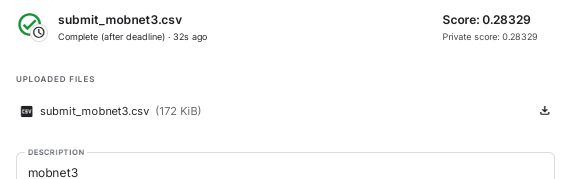

# MobileNetV3 - adaBelief

https://github.com/juntang-zhuang/Adabelief-Optimizer

In [72]:
!pip install adabelief-tf==0.2.0


In [88]:
from adabelief_tf import AdaBeliefOptimizer
optimizer = AdaBeliefOptimizer(learning_rate=1e-3, epsilon=1e-14)

Please check your arguments if you have upgraded adabelief-tf from version 0.0.1.
Modifications to default arguments:
                           eps  weight_decouple    rectify
-----------------------  -----  -----------------  -------------
adabelief-tf=0.0.1       1e-08  Not supported      Not supported
>=0.1.0 (Current 0.2.0)  1e-14  supported          default: True
SGD better than Adam (e.g. CNN for Image Classification)    Adam better than SGD (e.g. Transformer, GAN)
----------------------------------------------------------  ----------------------------------------------
Recommended epsilon = 1e-7                                  Recommended epsilon = 1e-14
For a complete table of recommended hyperparameters, see
https://github.com/juntang-zhuang/Adabelief-Optimizer
You can disable the log message by setting "print_change_log = False", though it is recommended to keep as a reminder.



AttributeError: ignored

# MobileNetV3 - SGD

## Загружаем предобученную модель

In [ ]:
# base_model - объект класса keras.models.Model (Functional Model)
from tensorflow.keras.applications import MobileNetV3Large

name = 'mobnet3_sgd'
base_model = MobileNetV3Large(
    # input_shape=None,
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)
    ,alpha=1.0,
    include_top=False,
    weights='imagenet',
    # input_tensor=None,
    pooling=None,
    # classes=1000,
    # classifier_activation='softmax',
    )

12683000/12683000 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "MobilenetV3large"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_3[0][0]']             
                                                                                                  
 Conv (Conv2D)               (None, 112, 112, 16)         432       ['rescaling[0][0]']           
                                                                                                  
 Conv/BatchNorm (BatchNorma  (None, 112, 112, 16)         64        ['Conv[0][0]']                
 lization)                                                                         

## Добавляем полносвязный слой

In [ ]:
# фиксируем все веса предобученной сети
for layer in base_model.layers:
    layer.trainable = False

x = base_model.layers[-1].output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256,activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(1,  # один выход (бинарная классификация)
                          activation='sigmoid',  # функция активации
                          kernel_regularizer=tf.keras.regularizers.l1(1e-4))(x)

model = tf.keras.Model(inputs=base_model.input, outputs=x, name='dogs_vs_cats')

## Выводим архитектуру модели

In [ ]:
model.summary()

Model: "dogs_vs_cats"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_3[0][0]']             
                                                                                                  
 Conv (Conv2D)               (None, 112, 112, 16)         432       ['rescaling[0][0]']           
                                                                                                  
 Conv/BatchNorm (BatchNorma  (None, 112, 112, 16)         64        ['Conv[0][0]']                
 lization)                                                                             

##Настраиваем параметры обучения

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=7, # how many epochs to wait before stopping
    restore_best_weights=True,
    )

In [ ]:
# Configure the learning rate reduction callback
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduce = ReduceLROnPlateau(
    monitor='val_accuracy',   # Metric to monitor for changes (usually validation accuracy)
    patience=5,          # Number of epochs with no improvement after which learning rate will be reduced
    verbose=1,           # Verbosity mode (0: silent, 1: update messages)
    factor=0.5,          # Factor by which the learning rate will be reduced (e.g., 0.5 means halving)
    min_lr=0.00001       # Lower bound for the learning rate (it won't go below this value)
    )

In [ ]:
# Create a learning rate schedule using Exponential Decay
from tensorflow.keras import optimizers

learning_rate_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,  # Initial learning rate for training
    decay_steps=1000,            # Number of steps before decaying the learning rate
    decay_rate=0.5,              # Rate at which the learning rate decreases
    )

# learning_rate = initial_learning_rate * decay_rate ^ (global_step / decay_steps)


In [ ]:
from keras.callbacks import LearningRateScheduler

# Create a Learning Rate Scheduler callback using a pre-defined schedule
lr_callback = LearningRateScheduler(learning_rate_schedule)


In [ ]:
# take callbacks together
callback=[
          lr_callback
          ,learning_rate_reduce
          ,early_stopping
          ]

## Компилируем модель и запускаем обучение

In [94]:
model.compile(optimizer=tf.keras.optimizers.experimental.SGD(
                        learning_rate=learning_rate_schedule,
                        # momentum=0.0,
                        # nesterov=False,
                        # weight_decay=None,
                        # clipnorm=None,
                        # clipvalue=None,
                        # global_clipnorm=None,
                        # use_ema=False,
                        # ema_momentum=0.99,
                        # ema_overwrite_frequency=None,
                        # jit_compile=True,
                        # name='SGD',
                        # # **kwargs
                        )
              # optimizers.Adam(learning_rate=learning_rate_schedule),
              ,loss='binary_crossentropy',  # функция потерь binary_crossentropy (log loss
              metrics=['accuracy'])

In [96]:
model.save(f'models/cats-dogs-{name}_pretrained.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [97]:
model = tf.keras.models.load_model(f'models/cats-dogs-{name}_pretrained.hdf5')

In [98]:
val_samples = 100  # число изображений в валидационной выборке

shuffle(train_files)  # перемешиваем обучающую выборку
validation_data = next(fit_generator(train_files[:val_samples], val_samples))
train_data = fit_generator(train_files[val_samples:])  # данные читаем функцией-генератором


In [99]:

# запускаем процесс обучения
for i in range(5):
    print(i)
# i=0
    model.fit(train_data,
              steps_per_epoch=10,  # число вызовов генератора за эпоху
              epochs=20,  # число эпох обучения
              validation_data=validation_data
              ,callbacks = callback
              )
    model.save(f'models/cats-dogs-{name}-{i}.hdf5')

0
Epoch 1/20
10/10 [==============================] - 29s 2s/step - loss: 2.6219 - accuracy: 0.7969 - val_loss: 0.2148 - val_accuracy: 0.8900 - lr: 0.0099
Epoch 2/20
10/10 [==============================] - 19s 2s/step - loss: 0.2072 - accuracy: 0.9187 - val_loss: 0.2293 - val_accuracy: 0.9100 - lr: 0.0099
Epoch 3/20
10/10 [==============================] - 19s 2s/step - loss: 0.2328 - accuracy: 0.9156 - val_loss: 0.1561 - val_accuracy: 0.9300 - lr: 0.0098
Epoch 4/20
10/10 [==============================] - 21s 2s/step - loss: 0.1934 - accuracy: 0.9062 - val_loss: 0.1593 - val_accuracy: 0.9300 - lr: 0.0097
Epoch 5/20
10/10 [==============================] - 22s 2s/step - loss: 0.1914 - accuracy: 0.9469 - val_loss: 0.1613 - val_accuracy: 0.9600 - lr: 0.0097
Epoch 6/20
10/10 [==============================] - 20s 2s/step - loss: 0.1308 - accuracy: 0.9469 - val_loss: 0.1822 - val_accuracy: 0.9400 - lr: 0.0096
Epoch 7/20
10/10 [==============================] - 21s 2s/step - loss: 0.1783 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1
Epoch 1/20
10/10 [==============================] - 23s 2s/step - loss: 0.1816 - accuracy: 0.9250 - val_loss: 0.1302 - val_accuracy: 0.9400 - lr: 0.0091
Epoch 2/20
10/10 [==============================] - 21s 2s/step - loss: 0.2243 - accuracy: 0.9250 - val_loss: 0.1831 - val_accuracy: 0.9100 - lr: 0.0090
Epoch 3/20
10/10 [==============================] - 21s 2s/step - loss: 0.1510 - accuracy: 0.9438 - val_loss: 0.1276 - val_accuracy: 0.9500 - lr: 0.0090
Epoch 4/20
10/10 [==============================] - 21s 2s/step - loss: 0.1558 - accuracy: 0.9406 - val_loss: 0.1389 - val_accuracy: 0.9500 - lr: 0.0089
Epoch 5/20
10/10 [==============================] - 19s 2s/step - loss: 0.1694 - accuracy: 0.9469 - val_loss: 0.1345 - val_accuracy: 0.9500 - lr: 0.0088
Epoch 6/20
10/10 [==============================] - 22s 2s/step - loss: 0.2187 - accuracy: 0.9219 - val_loss: 0.1331 - val_accuracy: 0.9400 - lr: 0.0088
Epoch 7/20
10/10 [==============================] - 19s 2s/step - loss: 0.1771 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2
Epoch 1/20
10/10 [==============================] - 19s 2s/step - loss: 0.1139 - accuracy: 0.9500 - val_loss: 0.1268 - val_accuracy: 0.9400 - lr: 0.0079
Epoch 2/20
10/10 [==============================] - 22s 2s/step - loss: 0.1390 - accuracy: 0.9531 - val_loss: 0.1203 - val_accuracy: 0.9400 - lr: 0.0079
Epoch 3/20
10/10 [==============================] - 20s 2s/step - loss: 0.1617 - accuracy: 0.9281 - val_loss: 0.1471 - val_accuracy: 0.9300 - lr: 0.0078
Epoch 4/20
10/10 [==============================] - 20s 2s/step - loss: 0.1471 - accuracy: 0.9531 - val_loss: 0.1155 - val_accuracy: 0.9400 - lr: 0.0077
Epoch 5/20
10/10 [==============================] - 20s 2s/step - loss: 0.1425 - accuracy: 0.9344 - val_loss: 0.1267 - val_accuracy: 0.9400 - lr: 0.0077
Epoch 6/20
10/10 [==============================] - ETA: 0s - loss: 0.1250 - accuracy: 0.9438
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0038182938005775213.
10/10 [==============================] - 21s 2s/step - loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3
Epoch 1/20
10/10 [==============================] - 19s 2s/step - loss: 0.1148 - accuracy: 0.9531 - val_loss: 0.1100 - val_accuracy: 0.9400 - lr: 0.0069
Epoch 2/20
10/10 [==============================] - 21s 2s/step - loss: 0.1109 - accuracy: 0.9500 - val_loss: 0.1000 - val_accuracy: 0.9500 - lr: 0.0068
Epoch 3/20
10/10 [==============================] - 20s 2s/step - loss: 0.0885 - accuracy: 0.9625 - val_loss: 0.1044 - val_accuracy: 0.9400 - lr: 0.0068
Epoch 4/20
10/10 [==============================] - 18s 2s/step - loss: 0.1699 - accuracy: 0.9438 - val_loss: 0.1075 - val_accuracy: 0.9400 - lr: 0.0067
Epoch 5/20
10/10 [==============================] - 21s 2s/step - loss: 0.1066 - accuracy: 0.9531 - val_loss: 0.1095 - val_accuracy: 0.9400 - lr: 0.0067
Epoch 6/20
10/10 [==============================] - 18s 2s/step - loss: 0.1027 - accuracy: 0.9656 - val_loss: 0.1133 - val_accuracy: 0.9400 - lr: 0.0066
Epoch 7/20
10/10 [==============================] - ETA: 0s - loss: 0.1222 - acc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4
Epoch 1/20
10/10 [==============================] - 19s 2s/step - loss: 0.1333 - accuracy: 0.9500 - val_loss: 0.0964 - val_accuracy: 0.9600 - lr: 0.0063
Epoch 2/20
10/10 [==============================] - 22s 2s/step - loss: 0.0947 - accuracy: 0.9688 - val_loss: 0.0866 - val_accuracy: 0.9500 - lr: 0.0063
Epoch 3/20
10/10 [==============================] - 20s 2s/step - loss: 0.1110 - accuracy: 0.9500 - val_loss: 0.0916 - val_accuracy: 0.9600 - lr: 0.0062
Epoch 4/20
10/10 [==============================] - 19s 2s/step - loss: 0.1376 - accuracy: 0.9375 - val_loss: 0.1061 - val_accuracy: 0.9600 - lr: 0.0062
Epoch 5/20
10/10 [==============================] - 21s 2s/step - loss: 0.1359 - accuracy: 0.9406 - val_loss: 0.1041 - val_accuracy: 0.9600 - lr: 0.0062
Epoch 6/20
10/10 [==============================] - ETA: 0s - loss: 0.1224 - accuracy: 0.9563
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.003058719914406538.
10/10 [==============================] - 22s 2s/step - loss: 0.1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [100]:
model.save(f'models/cats-dogs-{name}.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = tf.keras.models.load_model(f'models/cats-dogs-{name}.hdf5')

## Предсказания на проверочной выборке

In [101]:
test_pred = model.predict(
    predict_generator(test_files), steps=len(test_files))

12500/12500 [==============================] - 1344s 107ms/step


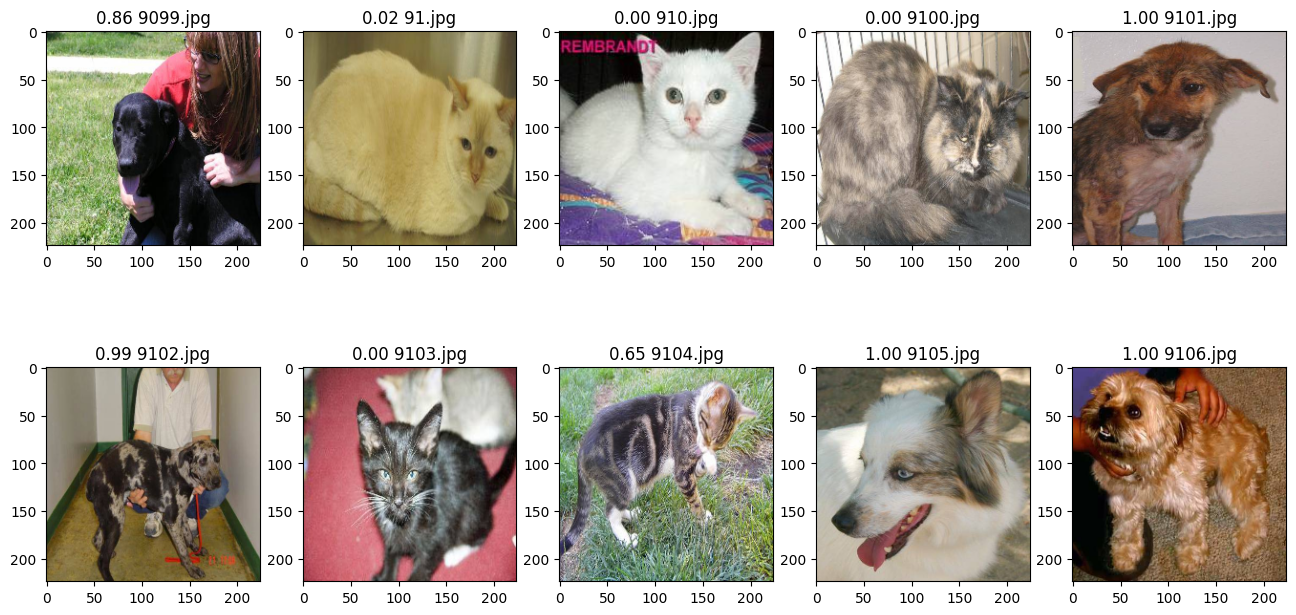

In [102]:
fig = plt.figure(figsize=(16, 8))
for i, (path, score) in enumerate(zip(test_files[:10], test_pred[:10]), 1):
    subplot = fig.add_subplot(2, 5, i)
    subplot.set_title('%.2f %s' % (score, os.path.basename(path)))
    img = cv2.imread(path)[...,::-1]
    img = cv2.resize(img, IMG_SIZE)
    subplot.imshow(img)

## Готовим данные для отправки

In [103]:
import re

f_path = f'data/final/submit_{name}.csv'
with open(f_path, 'w') as dst:
    dst.write('id,label\n')
    for path, score in zip(test_files, test_pred):
        dst.write('%s,%f\n' % (re.search('(\d+).jpg$', path).group(1), score))

In [105]:
!kaggle competitions submit -c dogs-vs-cats-redux-kernels-edition -f data/final/submit_mobnet3_sgd.csv -m "mobnet3_sgd"

100% 172k/172k [00:02<00:00, 81.7kB/s]
Successfully submitted to Dogs vs. Cats Redux: Kernels Edition

In [ ]:
# submit_mobnet3_sgd.csv

# Complete (after deadline) · now

# Score: 0.16865

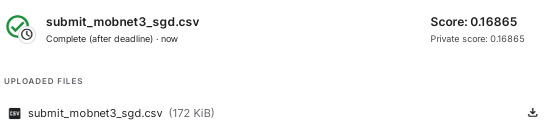

#Теория. Dogs vs Cats

https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import vgg16

print(tf.__version__)
print(tf.executing_eagerly())

## Функции загрузки данных

In [ ]:
import os
from random import shuffle
from glob import glob

IMG_SIZE = (224, 224)  # размер входного изображения сети

train_files = glob('data/train_sample/*.jpg')
test_files = glob('data/test_sample/*.jpg')

# загружаем входное изображение и предобрабатываем
def load_image(path, target_size=IMG_SIZE):
    img = cv2.imread(path)[...,::-1]
    img = cv2.resize(img, target_size)
    return vgg16.preprocess_input(img)  # предобработка для VGG16

# функция-генератор загрузки обучающих данных с диска
def fit_generator(files, batch_size=32):
    batch_size = min(batch_size, len(files))
    while True:
        shuffle(files)
        for k in range(len(files) // batch_size):
            i = k * batch_size
            j = i + batch_size
            if j > len(files):
                j = - j % len(files)
            x = np.array([load_image(path) for path in files[i:j]])
            y = np.array([1. if os.path.basename(path).startswith('dog') else 0.
                          for path in files[i:j]])
            yield (x, y)

# функция-генератор загрузки тестовых изображений с диска
def predict_generator(files):
    while True:
        for path in files:
            yield np.array([load_image(path)])

## Визуализируем примеры для обучения

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16, 8))
for i, path in enumerate(train_files[:10], 1):
    subplot = fig.add_subplot(2, 5, i)
    subplot.set_title('%s' % path.split('/')[-1])
    img = cv2.imread(path)[...,::-1]
    img = cv2.resize(img, IMG_SIZE)
    plt.imshow(img)

## Загружаем предобученную модель

In [ ]:
# base_model - объект класса keras.models.Model (Functional Model)
base_model = vgg16.VGG16(weights='imagenet',
                         include_top=False,
                         input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

In [ ]:
base_model.summary()

## Добавляем полносвязный слой

In [ ]:
# фиксируем все веса предобученной сети
for layer in base_model.layers:
    layer.trainable = False

x = base_model.layers[-5].output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1,  # один выход (бинарная классификация)
                          activation='sigmoid',  # функция активации
                          kernel_regularizer=tf.keras.regularizers.l1(1e-4))(x)

model = tf.keras.Model(inputs=base_model.input, outputs=x, name='dogs_vs_cats')

## Выводим архитектуру модели

In [ ]:
model.summary()

## Компилируем модель и запускаем обучение

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # функция потерь binary_crossentropy (log loss
              metrics=['accuracy'])

In [ ]:
val_samples = 5  # число изображений в валидационной выборке

shuffle(train_files)  # перемешиваем обучающую выборку
validation_data = next(fit_generator(train_files[:val_samples], val_samples))
train_data = fit_generator(train_files[val_samples:])  # данные читаем функцией-генератором

# запускаем процесс обучения
model.fit(train_data,
          steps_per_epoch=10,  # число вызовов генератора за эпоху
          epochs=100,  # число эпох обучения
          validation_data=validation_data)

In [ ]:
model.save('cats-dogs-vgg16.hdf5')

## Предсказания на проверочной выборке

In [ ]:
test_pred = model.predict(
    predict_generator(test_files), steps=len(test_files))

In [ ]:
fig = plt.figure(figsize=(16, 8))
for i, (path, score) in enumerate(zip(test_files[:10], test_pred[:10]), 1):
    subplot = fig.add_subplot(2, 5, i)
    subplot.set_title('%.2f %s' % (score, os.path.basename(path)))
    img = cv2.imread(path)[...,::-1]
    img = cv2.resize(img, IMG_SIZE)
    subplot.imshow(img)

## Готовим данные для отправки

In [ ]:
import re

with open('submit.txt', 'w') as dst:
    dst.write('id,label\n')
    for path, score in zip(test_files, test_pred):
        dst.write('%s,%f\n' % (re.search('(\d+).jpg$', path).group(1), score))

In [ ]:
# LogLoss = 1.04979